# Find the Cut Value

In [1]:
import os, sys, pprint
import math
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import joblib

In [2]:
Local_Philipp = True
Local_Valeria = False

In [3]:
scaling = 0.00463101

In [72]:
# Define branches that we need for our analysis
Masses = ['B0_M', 'B0_ErrM', 'B0_SigM', 'B0_K_S0_M', 'B0_K_S0_ErrM', 'B0_K_S0_SigM', 'B0_etap_M', 'B0_etap_ErrM', 
          'B0_etap_SigM', 'B0_etap_eta_M', 'B0_etap_eta_ErrM', 'B0_etap_eta_SigM']
Kinetics_CMS = ['B0_Pcms', 'B0_etap_Pcms', 'B0_etap_eta_Pcms', 'B0_etap_eta_gamma0_Pcms', 'B0_etap_eta_gamma1_Pcms',
                'B0_etap_pi0_Pcms', 'B0_etap_pi1_Pcms', 'B0_K_S0_Pcms']
Other_Kinetics = ['B0_deltae', 'B0_mbc']
DecayAngles = ['B0_decayAngle__bo0__bc', 'B0_decayAngle__bo1__bc', 'B0_etap_decayAngle__bo0__bc',
               'B0_etap_decayAngle__bo1__bc', 'B0_etap_decayAngle__bo2__bc']
Positions = ['B0_X', 'B0_ErrX', 'B0_Y', 'B0_ErrY', 'B0_Z', 'B0_ErrZ', 'B0_Rho',  
             'B0_etap_X', 'B0_etap_ErrX', 'B0_etap_Y', 'B0_etap_ErrY', 
             'B0_etap_Z', 'B0_etap_ErrZ', 'B0_etap_Rho',
             'B0_etap_eta_X', 'B0_etap_eta_ErrX', 'B0_etap_eta_Y',
             'B0_etap_eta_ErrY', 'B0_etap_eta_Z', 'B0_etap_eta_ErrZ', 'B0_etap_eta_Rho',
             'B0_etap_pi0_X', 'B0_etap_pi0_ErrX', 'B0_etap_pi0_Y', 'B0_etap_pi0_ErrY', 
             'B0_etap_pi0_Z', 'B0_etap_pi0_ErrZ', 'B0_etap_pi0_Rho', 
             'B0_etap_pi1_X', 'B0_etap_pi1_ErrX', 'B0_etap_pi1_Y', 'B0_etap_pi1_ErrY', 
             'B0_etap_pi1_Z', 'B0_etap_pi1_ErrZ', 'B0_etap_pi1_Rho', 
             'B0_K_S0_X', 'B0_K_S0_ErrX', 'B0_K_S0_Y', 'B0_K_S0_ErrY', 'B0_K_S0_Z',
             'B0_K_S0_ErrZ', 'B0_K_S0_Rho', 
             'B0_cosAngleBetweenMomentumAndVertexVector', 'B0_distance', 'B0_significanceOfDistance',
             'B0_dr', 'B0_etap_pi0_dr', 'B0_etap_pi1_dr', 'B0_K_S0_dr']
Vertex_Training = ['B0_VtxPvalue', 'B0_etap_VtxPvalue', 'B0_etap_eta_VtxPvalue', 'B0_etap_pi0_VtxPvalue',
                   'B0_etap_pi1_VtxPvalue', 'B0_K_S0_VtxPvalue', ]
Continuum_Suppression_Training = ['B0_TrCSMVA']

Training = Kinetics_CMS + Masses + Other_Kinetics + Continuum_Suppression_Training + Positions + DecayAngles + Vertex_Training
Important = Training + ['B0_isSignal', 'evt_no']

In [74]:
print(Training)

['B0_Pcms', 'B0_etap_Pcms', 'B0_etap_eta_Pcms', 'B0_etap_eta_gamma0_Pcms', 'B0_etap_eta_gamma1_Pcms', 'B0_etap_pi0_Pcms', 'B0_etap_pi1_Pcms', 'B0_K_S0_Pcms', 'B0_M', 'B0_ErrM', 'B0_SigM', 'B0_K_S0_M', 'B0_K_S0_ErrM', 'B0_K_S0_SigM', 'B0_etap_M', 'B0_etap_ErrM', 'B0_etap_SigM', 'B0_etap_eta_M', 'B0_etap_eta_ErrM', 'B0_etap_eta_SigM', 'B0_deltae', 'B0_mbc', 'B0_TrCSMVA', 'B0_X', 'B0_ErrX', 'B0_Y', 'B0_ErrY', 'B0_Z', 'B0_ErrZ', 'B0_Rho', 'B0_etap_X', 'B0_etap_ErrX', 'B0_etap_Y', 'B0_etap_ErrY', 'B0_etap_Z', 'B0_etap_ErrZ', 'B0_etap_Rho', 'B0_etap_eta_X', 'B0_etap_eta_ErrX', 'B0_etap_eta_Y', 'B0_etap_eta_ErrY', 'B0_etap_eta_Z', 'B0_etap_eta_ErrZ', 'B0_etap_eta_Rho', 'B0_etap_pi0_X', 'B0_etap_pi0_ErrX', 'B0_etap_pi0_Y', 'B0_etap_pi0_ErrY', 'B0_etap_pi0_Z', 'B0_etap_pi0_ErrZ', 'B0_etap_pi0_Rho', 'B0_etap_pi1_X', 'B0_etap_pi1_ErrX', 'B0_etap_pi1_Y', 'B0_etap_pi1_ErrY', 'B0_etap_pi1_Z', 'B0_etap_pi1_ErrZ', 'B0_etap_pi1_Rho', 'B0_K_S0_X', 'B0_K_S0_ErrX', 'B0_K_S0_Y', 'B0_K_S0_ErrY', 'B0_K_S0_Z'

In [5]:
from root_pandas import read_root

if Local_Philipp : 
    path = '/home/philipp/Desktop/Project/DATA/'
    SFiles = glob.glob(os.path.join(path, 'Signal/*.root'))
    CFiles = glob.glob(os.path.join(path, 'Continuous/*.root'))
    PFiles = glob.glob(os.path.join(path, 'Peaking/*.root'))
    DCFiles = glob.glob(os.path.join(path, 'DC/*.root'))
    
if Local_Valeria : 
    path = '/home/utente/Scrivania/Progetto LCP-B/DataBelle2_all/'
    SFiles = glob.glob(os.path.join(path, 'Signal/*.root'))
    CFiles = glob.glob(os.path.join(path, 'Background/Continuum/*.root'))
    PFiles = glob.glob(os.path.join(path, 'Background/Peaking/*.root'))
    DCFiles = glob.glob(os.path.join(path, 'DataChallenge/*.root'))
    
Signal = pd.concat((read_root(f, 'B0', columns=Important) for f in SFiles))
Signal = Signal[Signal['B0_isSignal']==1].reset_index(drop=True)
Continuum_bkg = pd.concat((read_root(f, 'B0', columns=Important) for f in CFiles))
Peaking_bkg = pd.concat((read_root(f, 'B0', columns=Important) for f in PFiles))
DC = pd.concat((read_root(f, 'B0', columns=Training) for f in DCFiles)).reset_index(drop=True)

#Signal: In case of more than 1 candidate per event select the first one occuring
Mask_duplicated = Signal.duplicated(subset='evt_no', keep='first')
Mask_duplicated=np.logical_not(Mask_duplicated)
Signal=Signal[Mask_duplicated]
Signal.reset_index(drop=True, inplace=True)

print("Signal : ",Signal.shape)
print(Signal['evt_no'].nunique())

Signal=Signal[Training]
Continuum_bkg=Continuum_bkg[Training]
Peaking_bkg=Peaking_bkg[Training]

Welcome to JupyROOT 6.16/00


/home/philipp/anaconda3/envs/Belle/lib/python3.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.16.4 is currently installed but you installed root_numpy against numpy 1.9.3. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


Signal :  (218596, 85)
218596


In [6]:
DC

B0_etap_pi0_ErrZ  B0_etap_decayAngle__bo0__bc  B0_etap_ErrX   B0_Pcms  \
0              0.027404                     0.970200           0.0  0.949089   
1              0.008951                     0.487965           0.0  0.134671   
2              0.008951                     0.546016           0.0  0.141258   
3              0.008951                     0.617351           0.0  0.281482   
4              0.008951                     0.557305           0.0  0.121087   
5              0.008951                     0.524363           0.0  0.211633   
6              0.008951                     0.540220           0.0  0.206744   
7              0.006311                     0.231538           0.0  0.865624   
8              0.006311                     0.267453           0.0  0.842772   
9              0.008019                     0.773221           0.0  0.767780   
10             0.006305                    -0.489623           0.0  0.293394   
11             0.021625                    -0.303545           0.0  0.906987   
12             0.169996                     0.557879           0.0  0.758086   
13             0.065886                    -0.883373           0.0  0.914562   
14             0.005048                     0.153656           0.0  0.805625   
15             0.005048                    -0.225104           0.0  0.853222   
16             0.005048                     0.153656           0.0  0.803733   
17             0.005048                    -0.225104           0.0  0.851209   
18             0.020229                     0.185657           0.0  0.612997   
19             0.002851                     0.115790           0.0  0.883422   
20             0.002851                     0.664021           0.0  0.806020   
21             0.002851                     0.647193           0.0  0.830002   
22             0.007148                     0.802338           0.0  0.681388   
23             0.002426                    -0.698295           0.0  0.896194   
24             0.002426                    -0.878914           0.0  0.777673   
25             0.002426                    -0.879339           0.0  0.781431   
26             0.153328                    -0.459231           0.0  0.397815   
27             0.277613                    -0.587786           0.0  0.824058   
28             0.277613                    -0.622980           0.0  0.855804   
29             0.277613                    -0.614190           0.0  0.848063   
...                 ...                          ...           ...       ...   
98717          0.012163                     0.889269           0.0  0.597526   
98718          0.318760                     0.335251           0.0  0.778643   
98719          0.318760                     0.342163           0.0  0.814229   
98720          0.318760                     0.311504           0.0  0.641339   
98721          0.318760                     0.320992           0.0  0.609267   
98722          0.205509                    -0.532395           0.0  0.060798   
98723          0.205509                    -0.521081           0.0  0.142191   
98724          0.004631                    -0.373990           0.0  0.513906   
98725          0.003163                     0.856249           0.0  0.344012   
98726          0.155491                     0.410098           0.0  0.311458   
98727          0.155491                     0.583959           0.0  0.364265   
98728          0.003665                     0.853151           0.0  0.530927   
98729          0.003665                     0.873264           0.0  0.522810   
98730          0.003665                     0.848469           0.0  0.537753   
98731          0.003665                     0.872893           0.0  0.503655   
98732          0.003482                    -0.514470           0.0  0.383688   
98733          0.004566                    -0.786737           0.0  0.866867   
98734          0.004014                     0.199727           0.0  0.795353   
98735  

In [7]:
!ls ../DATA/

B0_etapr-eta-gg2pi_KS-pi+pi-_output_ccbar_0.root
B0_etapr-eta-gg2pi_KS-pi+pi-_output_charged_17.root
B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_0.root
B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_1.root
B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_2.root
B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_3.root
B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_4.root
B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_5.root
B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_6.root
B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_7.root
B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_8.root
B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_9.root
B0_etapr-eta-gg2pi_KS-pi+pi-_output_ddbar_0.root
B0_etapr-eta-gg2pi_KS-pi+pi-_output_mixed_0.root
B0_etapr-eta-gg2pi_KS-pi+pi-_output_sgnMC9_BGx1_0.root
B0_etapr-eta-gg2pi_KS-pi+pi-_output_ssbar_0.root
B0_etapr-eta-gg2pi_KS-pi+pi-_output_tau_0.root
B0_etapr-eta-gg2pi_KS-pi+pi-_output_uubar_0.root
Belle2
Continuous
DC
Peaking
Signal
Test


In [8]:
from random import seed
from random import randint

n_seed=1234
seed(n_seed)

In [9]:
Signal['Type'] = 2
Continuum_bkg['Type'] = 1
Peaking_bkg['Type'] = 0

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

#SIGNAL: Train, Validation and test split (50%, 30%, 20%)
#Dataset divided into 50% of train data and 50% for validation and test
X = Signal.drop('Type',axis=1)
Y = Signal['Type']
#Y = to_categorical(Y, num_classes=3) # Binarize the labels
X_train_S, X_test_val_S, Y_train_S, Y_test_val_S = train_test_split(X, Y, train_size=0.5,random_state=randint(10**6,10**9))
#validation and test set divided into 30% for validation and 20% for test
X = X_test_val_S
Y = Y_test_val_S
X_validation_S, X_test_S, Y_validation_S, Y_test_S = train_test_split(X, Y, train_size=0.6,random_state=randint(10**6,10**9))
del(X_test_val_S)
del(Y_test_val_S)

#CONTINUUM BKG: Train, Validation and test split (50%, 30%, 20%)
#Dataset divided into 50% of train data and 50% for validation and test
X = Continuum_bkg.drop('Type',axis=1)
Y = Continuum_bkg['Type']
#Y = to_categorical(Y, num_classes=3) # Binarize the labels
X_train_C, X_test_val_C, Y_train_C, Y_test_val_C = train_test_split(X, Y, train_size=0.5,random_state=randint(10**6,10**9))
#validation and test set divided into 30% for validation and 20% for test
X = X_test_val_C
Y = Y_test_val_C
X_validation_C, X_test_C, Y_validation_C, Y_test_C = train_test_split(X, Y, train_size=0.6,random_state=randint(10**6,10**9))
del(X_test_val_C)
del(Y_test_val_C)

#PEAKING BKG: Train, Validation and test split (50%, 30%, 20%)
#Dataset divided into 50% of train data and 50% for validation and test
X = Peaking_bkg.drop('Type',axis=1)
Y = Peaking_bkg['Type']
#Y = to_categorical(Y, num_classes=3) # Binarize the labels
X_train_P, X_test_val_P, Y_train_P, Y_test_val_P = train_test_split(X, Y, train_size=0.5,random_state=randint(10**6,10**9))
#validation and test set divided into 30% for validation and 20% for test
X = X_test_val_P
Y = Y_test_val_P
X_validation_P, X_test_P, Y_validation_P, Y_test_P = train_test_split(X, Y, train_size=0.6,random_state=randint(10**6,10**9))
del(X_test_val_P)
del(Y_test_val_P)

# del(Signal)
# del(Peaking_bkg)
# del(Continuum_bkg)

Using TensorFlow backend.


In [10]:
#Define Training, Validation and Test datasets
X_Train=np.concatenate((X_train_S, X_train_C, X_train_P), axis=0)
X_Validation=np.concatenate((X_validation_S, X_validation_C, X_validation_P), axis=0)
X_Test=np.concatenate((X_test_S, X_test_C, X_test_P), axis=0)

Y_Train=np.concatenate((Y_train_S, Y_train_C, Y_train_P), axis=0)
Y_Validation=np.concatenate((Y_validation_S, Y_validation_C, Y_validation_P), axis=0)
Y_Test=np.concatenate((Y_test_S, Y_test_C, Y_test_P), axis=0)

Ỳ_Test_not_encoded=Y_Test #needed for cut value analysis

Y_Train=to_categorical(Y_Train, num_classes=3) # Binarize the labels
Y_Validation=to_categorical(Y_Validation, num_classes=3) # Binarize the labels
Y_Test=to_categorical(Y_Test, num_classes=3) # Binarize the labels

print(X_Train.shape)
print(X_Validation.shape)
print(X_Test.shape)

print("X Train shape : ", X_Train.shape)
print("X Validation shape : ",X_Validation.shape)
print("X Test shape : ",X_Test.shape)
n_classes = Y_Train.shape[1]


#shuffle the dataset
permutation = np.random.permutation(X_Train.shape[0])
X_Train = X_Train[permutation]
Y_Train = Y_Train[permutation]

permutation = np.random.permutation(X_Validation.shape[0])
X_Validation = X_Validation[permutation]
Y_Validation = Y_Validation[permutation]

permutation = np.random.permutation(X_Test.shape[0])
X_Test = X_Test[permutation]
Y_Test = Y_Test[permutation]

(233545, 83)
(140127, 83)
(93420, 83)
X Train shape :  (233545, 83)
X Validation shape :  (140127, 83)
X Test shape :  (93420, 83)


In [43]:
from keras.models import load_model
from sklearn.preprocessing import StandardScaler

Loaded_Model = load_model('Models/LastTry/Best_Model.h5')
ss = joblib.load('Models/LateNight/Scaler.pkl')
ss.get_params()
type(X_Test)

numpy.ndarray

In [45]:
X_Train = ss.fit_transform(X_Train)
X_Test = ss.transform(X_Test)
X_Validation = ss.transform(X_Validation)

In [46]:
pcTrain = X_Train.copy()
pcTest = X_Test.copy()
pcValidation = X_Validation.copy()

In [47]:
Loaded_Model.evaluate(pcTrain, Y_Train)

233545/233545 [==============================] - 4s 16us/step


[0.05925487601717762, 0.9828212978226895]

In [48]:
Loaded_Model.evaluate(pcTest, Y_Test)
Test_prob = Loaded_Model.predict(pcTest)
for t in Test_prob : print (t)

93420/93420 [==============================] - 1s 16us/step
[5.7082437e-04 3.5024624e-04 9.9907887e-01]
[0.00355016 0.0015369  0.99491286]
[1.2669450e-03 9.9851257e-01 2.2050277e-04]
[0.00354775 0.99434716 0.00210505]
[1.2966542e-02 9.8703349e-01 3.8364437e-08]
[6.0375184e-03 9.9396247e-01 2.3650035e-10]
[3.6277026e-03 9.9637234e-01 1.9899117e-08]
[6.5639714e-04 9.9816745e-05 9.9924386e-01]
[1.4302928e-03 9.9856973e-01 2.1347554e-10]
[4.6662404e-04 5.3970907e-05 9.9947947e-01]
[7.3697127e-04 1.8525345e-04 9.9907780e-01]
[0.00121649 0.02227049 0.976513  ]
[4.6660303e-04 5.3223714e-05 9.9948019e-01]
[1.9236017e-03 1.6008427e-04 9.9791628e-01]
[0.00267359 0.98066264 0.0166637 ]
[1.2026206e-03 9.9808252e-01 7.1481726e-04]
[0.00215166 0.00170847 0.9961398 ]
[2.1194254e-01 7.8805745e-01 2.9186398e-10]
[9.4365806e-04 1.1281471e-03 9.9792814e-01]
[0.00391471 0.9824615  0.01362386]
[8.1684167e-04 9.9367452e-01 5.5086357e-03]
[1.0060897e-03 7.5865784e-05 9.9891806e-01]
[0.00326713 0.90823674 0.0

[1.7198985e-03 9.9828005e-01 1.2895565e-07]
[3.21221654e-03 9.96678710e-01 1.09087305e-04]
[6.8481187e-03 9.9315190e-01 5.6900804e-11]
[0.00383746 0.01817269 0.97798985]
[1.1266016e-03 1.6831647e-04 9.9870503e-01]
[1.0198201e-03 4.6982841e-05 9.9893314e-01]
[5.7243864e-04 3.9724051e-04 9.9903035e-01]
[5.1195180e-04 9.9948800e-01 1.7545906e-08]
[4.4035628e-03 9.9559647e-01 1.3523208e-09]
[1.4650527e-03 1.4189551e-04 9.9839300e-01]
[4.3695164e-04 4.6841731e-05 9.9951625e-01]
[1.1769241e-03 9.9882311e-01 4.6074327e-08]
[1.1719915e-03 9.9879360e-01 3.4405177e-05]
[7.7726028e-04 2.4229533e-04 9.9898046e-01]
[0.00190416 0.01248279 0.98561305]
[1.1001668e-03 3.0138764e-05 9.9886972e-01]
[4.5008789e-04 2.0407232e-04 9.9934584e-01]
[9.719240e-04 1.404102e-03 9.976240e-01]
[5.6973996e-04 2.2612938e-05 9.9940765e-01]
[0.00117127 0.9752755  0.02355322]
[0.00211885 0.66526943 0.3326117 ]
[1.3204756e-03 9.9867743e-01 2.0668360e-06]
[7.1748748e-04 8.5623120e-05 9.9919695e-01]
[1.2269804e-03 9.9877077

[1.9681444e-03 9.4378891e-05 9.9793756e-01]
[5.5199006e-04 3.5909277e-05 9.9941206e-01]
[3.7817603e-03 9.9526763e-01 9.5060840e-04]
[1.3782068e-03 3.2205475e-04 9.9829978e-01]
[1.5601061e-03 9.9843985e-01 1.0604019e-11]
[0.00567495 0.94245255 0.05187247]
[1.4141527e-03 9.9858499e-01 8.8430318e-07]
[1.0826668e-03 7.0520276e-05 9.9884677e-01]
[4.4427003e-04 2.8024596e-04 9.9927551e-01]
[2.8890877e-03 9.9612951e-01 9.8134123e-04]
[5.3009577e-04 4.1971292e-05 9.9942786e-01]
[4.0102351e-04 1.9926295e-04 9.9939966e-01]
[4.3986277e-03 9.9560142e-01 6.6527527e-11]
[6.2214577e-04 2.5290819e-03 9.9684876e-01]
[1.7725232e-03 2.3028906e-04 9.9799711e-01]
[4.9673952e-04 2.0844145e-05 9.9948239e-01]
[2.5072226e-03 9.9741226e-01 8.0548278e-05]
[7.4370939e-04 4.2284213e-04 9.9883348e-01]
[1.2145932e-03 1.9781417e-05 9.9876571e-01]
[5.5011897e-04 1.4787595e-04 9.9930203e-01]
[0.0008817  0.80427194 0.19484639]
[6.6627143e-04 9.9872273e-01 6.1094580e-04]
[9.210006e-04 9.987686e-01 3.104304e-04]
[1.388090

[1.1538744e-03 2.9229576e-04 9.9855381e-01]
[2.7060578e-02 9.7293943e-01 6.1843711e-11]
[6.3050776e-03 5.9558148e-04 9.9309933e-01]
[8.9419394e-04 5.0554280e-03 9.9405032e-01]
[1.4170003e-03 9.9858296e-01 8.5232047e-12]
[8.3337858e-04 9.9912399e-01 4.2587304e-05]
[4.9785278e-03 9.9502122e-01 2.0983683e-07]
[7.62304757e-04 1.01558464e-04 9.99136150e-01]
[9.6285500e-04 3.8339541e-04 9.9865377e-01]
[1.7693648e-02 9.8230630e-01 6.1668365e-11]
[4.7000963e-03 9.9529994e-01 2.7203078e-09]
[1.0019033e-03 8.8987098e-04 9.9810827e-01]
[4.3553745e-04 1.6659798e-04 9.9939787e-01]
[2.2334463e-03 9.9776661e-01 5.1598911e-13]
[8.2679815e-04 1.1086928e-03 9.9806446e-01]
[0.00340467 0.06865963 0.92793566]
[9.4832486e-04 9.9905163e-01 6.6712067e-09]
[0.01284012 0.81126255 0.17589736]
[6.6631607e-04 4.0439212e-05 9.9929321e-01]
[0.00196399 0.0410252  0.95701075]
[0.00437065 0.9912361  0.00439322]
[4.5922678e-04 3.4487432e-05 9.9950624e-01]
[0.00628041 0.9908915  0.00282817]
[8.8258728e-04 3.8735321e-05 9

[3.8325109e-03 9.9616748e-01 1.2925448e-10]
[1.0303861e-03 9.9896884e-01 7.8334233e-07]
[2.1272898e-03 9.9787259e-01 6.3333758e-08]
[0.01218928 0.98117065 0.0066401 ]
[1.2118735e-03 9.9877840e-01 9.7282036e-06]
[0.00421933 0.9801062  0.01567452]
[2.6621716e-03 9.9733478e-01 2.9670741e-06]
[3.6120466e-03 9.9638075e-01 7.2601729e-06]
[1.1958620e-03 8.8631158e-04 9.9791783e-01]
[0.08678331 0.37793723 0.53527945]
[2.9199952e-03 9.9708003e-01 7.0027047e-11]
[2.4183320e-03 9.9758160e-01 2.4209208e-09]
[0.00106484 0.9047104  0.09422477]
[8.0248230e-04 9.9919754e-01 6.3170695e-09]
[1.7525578e-03 9.9824750e-01 1.0415369e-12]
[6.6359626e-04 7.6497774e-05 9.9925989e-01]
[8.3288667e-04 1.8096789e-04 9.9898618e-01]
[5.9162062e-03 9.9408370e-01 1.5660956e-07]
[3.6666172e-03 9.9575508e-01 5.7833228e-04]
[1.1136004e-03 9.9888641e-01 1.5427794e-08]
[5.9043453e-04 9.9937373e-01 3.5861802e-05]
[0.0297136  0.89986306 0.07042337]
[4.026442e-03 9.959735e-01 4.545310e-09]
[1.8845368e-03 9.9797779e-01 1.37655

[2.2879620e-03 9.9771190e-01 1.4100866e-07]
[0.00136471 0.0011614  0.9974739 ]
[1.85690704e-03 9.98143077e-01 1.41030295e-11]
[1.8131129e-02 9.8184103e-01 2.7885653e-05]
[8.3972648e-04 3.7027577e-05 9.9912328e-01]
[8.9820416e-04 6.0018804e-04 9.9850166e-01]
[6.756575e-04 4.857064e-04 9.988386e-01]
[0.01208717 0.9853344  0.00257841]
[1.0444764e-03 5.4381868e-05 9.9890113e-01]
[0.00182227 0.98424244 0.01393527]
[1.7288349e-03 1.5469984e-04 9.9811649e-01]
[1.0451144e-02 9.8954684e-01 2.0408797e-06]
[2.4484023e-03 9.9753308e-01 1.8521087e-05]
[1.0519176e-03 9.9894816e-01 8.9717941e-13]
[8.4033917e-04 3.7478192e-05 9.9912220e-01]
[5.116379e-04 3.101724e-05 9.994573e-01]
[3.9364112e-04 5.9885764e-04 9.9900752e-01]
[3.1754273e-04 6.9521775e-05 9.9961299e-01]
[0.04964069 0.30670124 0.6436581 ]
[6.4515643e-04 5.5391236e-05 9.9929941e-01]
[2.1535871e-03 9.9784446e-01 1.9422926e-06]
[1.0196026e-03 1.6830096e-04 9.9881208e-01]
[6.4878529e-03 9.9350947e-01 2.5499776e-06]
[8.7933976e-04 2.8000033e-0

[1.2242023e-03 9.9877387e-01 1.8740710e-06]
[1.4940632e-03 9.9850595e-01 3.3830688e-10]
[7.7415042e-04 4.2265583e-05 9.9918360e-01]
[6.3700217e-04 9.9934834e-01 1.4685622e-05]
[4.8639628e-04 7.0998736e-04 9.9880362e-01]
[1.9793427e-03 7.0124085e-04 9.9731940e-01]
[4.242500e-04 3.340581e-04 9.992417e-01]
[1.6809250e-03 7.1847098e-05 9.9824727e-01]
[0.00189461 0.56372225 0.43438318]
[1.9070021e-03 9.9809295e-01 3.9493625e-12]
[1.4946891e-03 7.8152749e-04 9.9772376e-01]
[1.6294360e-03 9.9837059e-01 5.2442284e-10]
[1.7170433e-02 9.8282963e-01 1.6152706e-12]
[2.4665557e-03 9.9753332e-01 1.4874438e-07]
[7.6345046e-04 1.1826209e-04 9.9911827e-01]
[1.1428925e-03 1.5432463e-04 9.9870276e-01]
[9.2287117e-04 9.9863809e-01 4.3903277e-04]
[4.8656240e-02 9.5134377e-01 4.0581072e-10]
[7.2937069e-04 1.6762651e-04 9.9910307e-01]
[0.00868932 0.98438454 0.00692614]
[6.7704124e-04 3.6268051e-05 9.9928671e-01]
[1.5214279e-03 3.8741506e-05 9.9843985e-01]
[0.0098501  0.97315705 0.01699284]
[1.4259149e-03 9.9

[2.3273915e-02 9.7672594e-01 7.1635405e-08]
[0.00400933 0.98888844 0.00710221]
[0.00142126 0.02363517 0.97494364]
[0.00485709 0.9475957  0.04754722]
[7.0354959e-04 9.9929035e-01 6.0290031e-06]
[4.3812427e-03 9.9505639e-01 5.6243176e-04]
[4.3034711e-04 4.0818086e-05 9.9952888e-01]
[1.2341533e-03 8.9222725e-05 9.9867660e-01]
[0.01628561 0.10914879 0.87456566]
[2.3732563e-03 3.1105790e-04 9.9731570e-01]
[0.00407794 0.9947389  0.00118325]
[0.00171757 0.02409492 0.97418755]
[8.455976e-03 9.915440e-01 3.790089e-11]
[9.3182945e-04 2.7923388e-04 9.9878901e-01]
[0.00622697 0.9920339  0.00173911]
[0.00411656 0.00485978 0.99102366]
[1.8765863e-03 9.9812335e-01 2.6385266e-08]
[6.4313313e-04 9.9917442e-01 1.8245449e-04]
[6.5439316e-03 9.9345607e-01 8.8665603e-11]
[5.8520207e-04 1.7965614e-03 9.9761826e-01]
[1.4070541e-03 9.9859291e-01 7.4781719e-09]
[1.3774839e-03 9.9857867e-01 4.3860946e-05]
[3.0668322e-03 9.9692601e-01 7.0810947e-06]
[6.6774531e-04 2.5988035e-04 9.9907231e-01]
[6.4658630e-03 9.93

[1.1097618e-03 6.0647388e-05 9.9882954e-01]
[9.3192258e-04 9.9819082e-01 8.7720575e-04]
[6.2612034e-03 9.9373877e-01 3.2505465e-08]
[8.9306841e-03 9.9106884e-01 4.9025397e-07]
[1.1810700e-03 5.3674452e-05 9.9876523e-01]
[6.5528248e-03 9.9344712e-01 1.1653652e-11]
[9.8335918e-04 4.1196497e-05 9.9897552e-01]
[9.224611e-04 2.597021e-05 9.990515e-01]
[4.6811745e-04 9.9950814e-01 2.3740327e-05]
[0.00103815 0.00501357 0.9939482 ]
[7.5469620e-04 5.7596491e-05 9.9918765e-01]
[2.4668991e-03 9.4369323e-05 9.9743867e-01]
[4.5547122e-03 9.9544525e-01 1.2190145e-08]
[8.5872872e-04 1.6233135e-03 9.9751794e-01]
[2.3117275e-03 9.9768829e-01 4.5825965e-11]
[0.00816717 0.975759   0.01607379]
[6.5455690e-04 9.9934548e-01 1.2500301e-10]
[1.1466626e-03 9.9829739e-01 5.5602437e-04]
[6.9514691e-04 8.5779488e-05 9.9921906e-01]
[3.3499626e-03 5.9743691e-04 9.9605262e-01]
[5.8930658e-04 4.9937804e-05 9.9936074e-01]
[0.0010337 0.0025559 0.9964104]
[0.2939586  0.68189126 0.02415008]
[8.8852597e-04 6.9005910e-05 9

[1.1947004e-03 1.7058388e-04 9.9863476e-01]
[3.6468287e-03 9.9635315e-01 1.4948685e-10]
[8.7668293e-04 2.2738849e-04 9.9889588e-01]
[9.6170907e-04 2.9437413e-02 9.6960092e-01]
[0.00404039 0.93641734 0.05954221]
[5.4788170e-03 9.9452114e-01 1.0855538e-10]
[5.3583650e-04 1.0292473e-03 9.9843496e-01]
[0.00675731 0.00523168 0.98801106]
[5.177905e-04 3.844785e-05 9.994437e-01]
[1.5847598e-03 9.9841523e-01 1.7771837e-12]
[1.0983935e-03 1.6541118e-04 9.9873620e-01]
[1.5996397e-03 9.9840003e-01 3.2210076e-07]
[1.2770669e-03 5.4806791e-05 9.9866819e-01]
[7.2303065e-04 9.9927694e-01 1.0539980e-08]
[0.01704142 0.822483   0.16047546]
[1.2409413e-03 9.9875903e-01 9.0741894e-09]
[0.0082856  0.03271836 0.95899606]
[7.8481585e-03 9.9215186e-01 1.4466053e-10]
[1.3889890e-02 9.8610997e-01 1.4399635e-07]
[0.00378629 0.9925827  0.00363101]
[0.00133345 0.9926878  0.00597873]
[0.00397474 0.91133213 0.08469307]
[0.00479979 0.92822325 0.0669769 ]
[6.2527056e-03 9.9374723e-01 6.2773441e-12]
[0.00155532 0.00497

[0.00268321 0.00199949 0.99531734]
[7.7919755e-04 9.9922085e-01 1.7843381e-10]
[0.00299834 0.09199874 0.90500295]
[0.00109093 0.01396284 0.98494625]
[8.3887856e-04 1.0685686e-03 9.9809259e-01]
[8.5587159e-04 3.8164316e-04 9.9876249e-01]
[6.4110849e-04 5.5556677e-05 9.9930334e-01]
[7.4878358e-04 1.1548394e-03 9.9809641e-01]
[1.1603232e-02 9.8839658e-01 9.7449401e-08]
[9.5547206e-04 2.0001184e-04 9.9884450e-01]
[9.1271073e-04 9.9908733e-01 1.0261205e-09]
[1.0739736e-03 9.9845922e-01 4.6680256e-04]
[6.4743182e-04 5.1178718e-05 9.9930143e-01]
[0.00199181 0.95589393 0.04211429]
[1.5969478e-03 1.5338998e-04 9.9824959e-01]
[8.1071310e-04 4.3179846e-04 9.9875748e-01]
[1.8993658e-03 9.9751222e-01 5.8841013e-04]
[0.00224278 0.9890455  0.0087118 ]
[1.5255725e-03 1.4447281e-04 9.9832994e-01]
[1.8285352e-03 8.9420466e-04 9.9727732e-01]
[2.420733e-02 9.757927e-01 3.911964e-10]
[1.3284751e-03 9.9866951e-01 2.0208045e-06]
[0.01045338 0.06948165 0.920065  ]
[3.9683227e-04 3.9806397e-05 9.9956340e-01]
[

[9.2471909e-04 4.5641606e-05 9.9902964e-01]
[9.3382155e-04 7.8330282e-05 9.9898785e-01]
[1.4197188e-03 9.9858034e-01 1.5933873e-12]
[0.04073393 0.8431227  0.11614344]
[4.8882788e-04 3.8266878e-04 9.9912852e-01]
[6.3169864e-04 1.9218742e-04 9.9917608e-01]
[2.6116317e-02 9.7388363e-01 7.4055762e-10]
[9.9854684e-04 9.9861884e-01 3.8258632e-04]
[7.1995624e-04 4.7490859e-04 9.9880517e-01]
[0.00145314 0.00458794 0.99395895]
[6.7845257e-03 9.9321556e-01 1.2037578e-10]
[3.0420602e-03 9.9695396e-01 3.9128699e-06]
[4.2539902e-04 3.6417862e-04 9.9921036e-01]
[5.4251455e-04 2.3820518e-05 9.9943370e-01]
[1.1394359e-03 1.1315821e-04 9.9874735e-01]
[1.61336921e-03 1.02290556e-04 9.98284280e-01]
[2.2484837e-03 9.9775153e-01 1.1912485e-09]
[1.6753994e-03 9.9820483e-01 1.1965406e-04]
[3.8197997e-03 9.9532938e-01 8.5088069e-04]
[5.83575456e-04 1.02387676e-04 9.99314070e-01]
[3.4526329e-02 9.6547359e-01 1.0503814e-07]
[1.5086192e-03 2.3547607e-04 9.9825591e-01]
[0.00240438 0.9948094  0.00278621]
[0.001033

[0.00131291 0.97096246 0.02772464]
[5.0125220e-03 9.9498749e-01 1.6371238e-09]
[2.6576691e-03 9.9642605e-01 9.1628969e-04]
[6.2290486e-04 3.7301672e-04 9.9900407e-01]
[3.4109622e-03 9.9658883e-01 1.8893478e-07]
[1.4530116e-02 9.8546982e-01 2.8122491e-09]
[3.2068547e-04 8.7445500e-05 9.9959189e-01]
[6.5260328e-04 4.8532290e-04 9.9886215e-01]
[0.00464921 0.9870144  0.00833639]
[0.00126407 0.0089668  0.9897691 ]
[0.01150315 0.97022104 0.01827578]
[3.1667526e-03 9.9683326e-01 4.5007464e-09]
[2.7491867e-03 9.9725085e-01 1.9807972e-08]
[5.8798781e-03 9.9412006e-01 2.0318430e-10]
[5.1508313e-03 9.9484915e-01 2.4366581e-12]
[6.6572044e-04 7.8539502e-05 9.9925572e-01]
[1.5082821e-02 9.8490751e-01 9.6516278e-06]
[5.606582e-04 2.605533e-04 9.991788e-01]
[7.0348883e-04 2.0175474e-05 9.9927634e-01]
[0.00832547 0.98745245 0.00422199]
[4.5584913e-04 9.9757221e-05 9.9944443e-01]
[8.330427e-04 5.489681e-04 9.986180e-01]
[8.0704711e-02 9.1929233e-01 3.0007081e-06]
[9.0900279e-04 1.0367514e-04 9.9898726e

[3.0664896e-04 1.2251479e-03 9.9846822e-01]
[0.00107211 0.0036362  0.9952917 ]
[6.4080564e-04 6.5087323e-04 9.9870837e-01]
[0.00154053 0.00154808 0.99691147]
[0.00103941 0.00368162 0.99527895]
[3.1622493e-04 3.7932794e-05 9.9964583e-01]
[3.2762075e-03 9.9672383e-01 1.6293861e-09]
[1.0227214e-03 6.2851490e-05 9.9891448e-01]
[2.7530312e-03 9.9724686e-01 8.3674763e-08]
[1.8919485e-03 9.9810803e-01 9.2752467e-10]
[5.3206375e-03 9.9467939e-01 1.7779477e-09]
[8.0104667e-04 5.1966217e-05 9.9914694e-01]
[2.1543764e-03 9.9784565e-01 5.0631192e-12]
[0.00161047 0.12630858 0.872081  ]
[8.5440703e-04 9.9914563e-01 1.6803327e-10]
[7.5784558e-04 9.9924219e-01 3.7212335e-08]
[1.2192020e-02 9.8780805e-01 1.1617795e-08]
[1.1006938e-03 2.9452287e-05 9.9886984e-01]
[1.4338676e-02 9.8566139e-01 1.4985511e-08]
[0.00357155 0.01245153 0.98397696]
[0.00161486 0.9916255  0.00675965]
[6.3139148e-04 2.4311916e-05 9.9934429e-01]
[1.2439794e-03 1.3362635e-04 9.9862242e-01]
[0.00167404 0.9962514  0.00207456]
[1.3844

[0.00166976 0.00102197 0.99730825]
[6.7990221e-04 1.0421181e-04 9.9921584e-01]
[5.5310474e-04 9.9944192e-01 5.0190115e-06]
[5.632573e-04 6.583521e-04 9.987784e-01]
[0.00185941 0.09459382 0.9035468 ]
[8.2649448e-04 5.5990382e-05 9.9911755e-01]
[4.4999697e-04 7.7231566e-04 9.9877769e-01]
[0.01148428 0.04171842 0.9467973 ]
[0.00136723 0.00111193 0.99752086]
[8.2961610e-03 9.9170309e-01 8.4170347e-07]
[0.00222223 0.9844928  0.01328496]
[1.1978784e-03 9.9880147e-01 5.5695517e-07]
[1.1874880e-03 4.2381100e-05 9.9877006e-01]
[5.5830292e-03 9.9440408e-01 1.2936434e-05]
[8.4871385e-04 2.6645206e-02 9.7250611e-01]
[0.01186792 0.93375653 0.05437562]
[0.01165509 0.9446862  0.04365868]
[9.8761339e-03 9.9012393e-01 1.2085762e-10]
[1.34737305e-02 9.86128330e-01 3.97872704e-04]
[5.6481746e-04 1.1631378e-02 9.8780382e-01]
[1.0819413e-03 9.9891603e-01 2.0253478e-06]
[7.3613413e-04 4.2956115e-05 9.9922085e-01]
[3.0593595e-03 9.9694061e-01 6.9543937e-12]
[2.240613e-03 9.977592e-01 6.779929e-08]
[0.0045931

[6.9014420e-04 7.8983867e-05 9.9923086e-01]
[1.4681383e-03 7.0313754e-04 9.9782866e-01]
[1.2537123e-03 1.0188867e-04 9.9864441e-01]
[3.3373691e-02 9.6662629e-01 5.7631955e-10]
[1.8220160e-03 3.5482470e-04 9.9782324e-01]
[0.00871265 0.9847342  0.00655312]
[0.00912352 0.9658089  0.02506748]
[6.654143e-04 9.993293e-01 5.233514e-06]
[3.870722e-03 9.961293e-01 8.328539e-10]
[1.5606127e-03 9.9843937e-01 4.9926931e-11]
[1.0856505e-03 7.5300457e-05 9.9883908e-01]
[1.03470115e-02 9.89652932e-01 6.56555033e-10]
[1.8324036e-03 1.3815610e-04 9.9802941e-01]
[1.1758329e-03 9.9783856e-01 9.8565943e-04]
[0.01205649 0.8721365  0.11580701]
[0.00281101 0.96152484 0.03566419]
[5.5280438e-04 2.2024236e-04 9.9922693e-01]
[1.10667304e-03 9.98893321e-01 1.04924465e-10]
[4.3831757e-04 9.9955803e-01 3.6691513e-06]
[1.8746154e-03 9.9812537e-01 4.8765685e-09]
[4.1063395e-03 9.9586040e-01 3.3279706e-05]
[3.7734897e-03 9.9622655e-01 1.7525116e-08]
[2.3673347e-03 9.9763227e-01 3.4647684e-07]
[0.00235012 0.9915364  0

[8.6502859e-04 9.9913222e-01 2.7742024e-06]
[8.2257186e-04 5.2311858e-05 9.9912518e-01]
[1.9351054e-03 9.9802631e-01 3.8554070e-05]
[5.8785500e-04 5.8044276e-05 9.9935406e-01]
[5.2187912e-04 6.4108557e-05 9.9941397e-01]
[5.7470612e-03 9.9413127e-01 1.2167021e-04]
[3.0402470e-02 9.6959597e-01 1.4997800e-06]
[6.8793870e-03 9.9312055e-01 1.1055568e-07]
[5.2724360e-04 1.1314576e-04 9.9935967e-01]
[7.344407e-04 9.992600e-01 5.612799e-06]
[1.475981e-03 1.223734e-04 9.984017e-01]
[1.6060591e-03 9.9839395e-01 1.7927889e-09]
[0.00309547 0.82605237 0.17085215]
[1.2993668e-03 9.9870062e-01 3.6134550e-12]
[1.5401023e-03 4.8002643e-05 9.9841189e-01]
[5.97648497e-04 1.08304564e-04 9.99294043e-01]
[0.00276928 0.9953549  0.00187586]
[0.00323909 0.00424586 0.992515  ]
[0.00184615 0.99326295 0.00489088]
[7.1936869e-04 9.9928051e-01 1.5846308e-07]
[6.9375403e-02 9.3062454e-01 2.2350484e-10]
[7.2906603e-04 1.6504012e-04 9.9910587e-01]
[0.00940199 0.19401358 0.79658437]
[0.00244901 0.00162373 0.9959273 ]
[

[0.00405291 0.9692647  0.02668246]
[1.1258081e-03 4.5989398e-04 9.9841428e-01]
[1.24312320e-03 1.20201505e-04 9.98636663e-01]
[7.7207788e-04 7.0961119e-05 9.9915695e-01]
[7.9860806e-04 9.9850488e-01 6.9660746e-04]
[5.9733604e-04 1.7367017e-04 9.9922895e-01]
[1.2843836e-03 3.1235621e-05 9.9868435e-01]
[0.00120602 0.00150687 0.99728715]
[1.23740616e-03 1.09100256e-04 9.98653412e-01]
[2.1637110e-03 6.7364250e-04 9.9716264e-01]
[5.3775366e-03 9.9441469e-01 2.0785810e-04]
[8.5213594e-04 3.4620025e-05 9.9911326e-01]
[4.0512276e-03 9.9594879e-01 5.0345972e-09]
[8.0818654e-04 4.5621971e-04 9.9873561e-01]
[0.00464407 0.9461606  0.04919537]
[0.00306333 0.980015   0.01692164]
[9.6397512e-03 9.9036026e-01 1.5447179e-09]
[3.5735306e-03 9.9642617e-01 3.7709029e-07]
[4.764138e-04 3.085856e-03 9.964378e-01]
[5.1254721e-04 2.6784782e-04 9.9921954e-01]
[2.4668318e-03 9.9753320e-01 1.0867708e-10]
[2.2621970e-03 9.9773753e-01 2.1226873e-07]
[4.5161895e-04 1.1064623e-04 9.9943775e-01]
[8.8548334e-04 8.3914

[0.00111293 0.9494969  0.04939023]
[0.00364601 0.9621831  0.03417081]
[3.9617387e-03 9.9603516e-01 3.0968797e-06]
[0.00711446 0.9638738  0.02901181]
[1.2563082e-03 9.9874371e-01 4.5813735e-12]
[0.00108535 0.96205205 0.03686262]
[0.00136932 0.996036   0.00259479]
[2.6176511e-03 9.9738234e-01 2.0923129e-10]
[8.7318773e-04 3.1939865e-04 9.9880743e-01]
[1.1794183e-03 9.9882060e-01 1.1381696e-12]
[7.3013548e-04 4.0535546e-05 9.9922931e-01]
[1.1685371e-03 9.9883145e-01 2.4294120e-08]
[1.5375232e-03 9.9846244e-01 3.1067332e-12]
[0.00366106 0.00421235 0.9921266 ]
[1.0615250e-03 9.9893850e-01 3.8155676e-10]
[1.5011670e-03 4.0338835e-04 9.9809545e-01]
[0.0071001 0.9394489 0.053451 ]
[5.0600391e-04 9.9949396e-01 8.2466922e-09]
[9.0092910e-04 1.6640031e-03 9.9743503e-01]
[2.9756933e-02 9.7024304e-01 1.0060700e-08]
[1.1091358e-03 9.9889082e-01 6.4199803e-08]
[5.6477846e-04 7.1796676e-05 9.9936348e-01]
[4.5243306e-03 9.9547571e-01 5.3886891e-12]
[0.00103927 0.00155208 0.9974087 ]
[1.0792697e-03 4.99

[2.3482699e-02 9.7651666e-01 7.2223884e-07]
[2.0821709e-03 9.9787116e-01 4.6616493e-05]
[2.5036756e-03 1.0525489e-04 9.9739099e-01]
[2.8917252e-03 9.9710828e-01 3.1605421e-10]
[1.4595223e-03 1.1161831e-04 9.9842888e-01]
[0.00101588 0.96149397 0.03749021]
[1.6781751e-03 9.9831498e-01 6.9523098e-06]
[1.3698684e-03 5.1128358e-05 9.9857903e-01]
[4.4996286e-04 8.7275002e-05 9.9946278e-01]
[0.00528728 0.02532118 0.9693915 ]
[5.9255667e-04 1.3215882e-05 9.9939418e-01]
[3.4050911e-03 9.9656087e-01 3.3927718e-05]
[1.3842287e-03 9.5250399e-04 9.9766326e-01]
[1.0601538e-03 1.8353775e-04 9.9875629e-01]
[5.3150381e-04 1.7580389e-05 9.9945086e-01]
[7.3106065e-03 9.9226511e-01 4.2428490e-04]
[2.3594666e-03 9.9764061e-01 7.1156470e-12]
[5.9686840e-04 2.1443803e-04 9.9918872e-01]
[0.0026787  0.00592311 0.9913982 ]
[1.2799326e-03 9.9871993e-01 8.4530541e-08]
[1.2930144e-03 9.9870694e-01 1.2665983e-08]
[1.9143501e-03 9.9808395e-01 1.6370734e-06]
[3.4460253e-03 9.9655402e-01 1.3367137e-09]
[4.2201465e-04 

[0.00409844 0.95144403 0.04445752]
[7.9508489e-03 9.9204797e-01 1.1738623e-06]
[5.1461445e-04 9.9942172e-01 6.3682266e-05]
[0.00241914 0.8245004  0.17308041]
[0.00122866 0.01240218 0.98636913]
[0.00461194 0.9895676  0.00582041]
[0.0207024  0.97462535 0.00467226]
[7.9419476e-04 6.6757624e-05 9.9913907e-01]
[0.00532413 0.98737526 0.0073006 ]
[6.9150439e-04 9.9930823e-01 1.8499783e-07]
[9.6419435e-03 9.9035794e-01 6.1639525e-08]
[1.5862656e-03 9.9841368e-01 9.9350475e-09]
[4.5933831e-04 1.6399195e-04 9.9937671e-01]
[7.661583e-04 4.789823e-05 9.991860e-01]
[9.6312433e-04 9.3705545e-05 9.9894315e-01]
[0.00557952 0.9856866  0.00873387]
[0.001084   0.01461173 0.98430425]
[1.2920289e-03 5.8571890e-04 9.9812227e-01]
[0.00342276 0.9847621  0.01181511]
[1.0730854e-03 6.7766508e-05 9.9885917e-01]
[3.4644635e-04 8.7931490e-05 9.9956566e-01]
[1.9122468e-03 1.1481011e-04 9.9797291e-01]
[1.4963502e-03 4.0299918e-05 9.9846339e-01]
[0.00306083 0.00150415 0.99543506]
[8.0649025e-04 9.9886501e-01 3.284924

[0.00122338 0.0015893  0.9971873 ]
[4.5456138e-04 3.6828761e-04 9.9917716e-01]
[8.6175068e-04 5.8038457e-04 9.9855787e-01]
[3.6610093e-04 1.0263246e-03 9.9860758e-01]
[5.7609044e-03 9.9423909e-01 1.9047966e-10]
[0.0217629  0.77588    0.20235711]
[1.3634027e-03 9.9863189e-01 4.6516907e-06]
[1.4672657e-03 9.9853265e-01 8.6269083e-08]
[5.2648713e-04 3.7304132e-04 9.9910045e-01]
[1.3289365e-03 2.4796286e-04 9.9842310e-01]
[4.1199168e-03 9.9588013e-01 3.0963279e-09]
[1.3611757e-03 9.9863881e-01 9.4247743e-10]
[1.8817023e-03 3.4355337e-04 9.9777478e-01]
[1.2000110e-02 9.8799974e-01 1.0642701e-07]
[2.8946504e-03 9.9710518e-01 8.5837087e-08]
[8.4078647e-03 9.9159217e-01 1.1053596e-11]
[9.0695368e-03 9.9093050e-01 2.7186092e-08]
[0.00738802 0.9914854  0.00112658]
[4.9062897e-03 5.4614421e-04 9.9454761e-01]
[1.3023741e-03 7.7917190e-05 9.9861968e-01]
[1.0423051e-03 2.4138724e-04 9.9871635e-01]
[2.1632425e-03 9.9705839e-01 7.7845872e-04]
[7.7539391e-04 9.9922454e-01 2.5677242e-12]
[3.38384742e-03

[4.5774207e-03 9.9497104e-01 4.5149759e-04]
[5.4606714e-04 8.2329882e-04 9.9863064e-01]
[1.01554887e-02 9.89844561e-01 1.06230746e-10]
[4.2630914e-03 9.9571204e-01 2.4971001e-05]
[0.0011556  0.98437554 0.01446885]
[6.6467159e-04 1.5121142e-03 9.9782324e-01]
[1.4661050e-03 3.8528195e-04 9.9814868e-01]
[7.1740285e-03 9.9282598e-01 2.8708740e-09]
[0.00347201 0.9934516  0.00307645]
[5.0097366e-04 7.0084345e-05 9.9942893e-01]
[4.5482544e-03 9.9524987e-01 2.0186076e-04]
[3.3812304e-03 9.9661875e-01 1.0798890e-09]
[5.6198094e-04 6.6200490e-05 9.9937183e-01]
[1.1723702e-03 9.9882764e-01 1.4537037e-12]
[1.0891731e-03 9.9891078e-01 2.5971616e-08]
[3.5062283e-03 9.9622118e-01 2.7257786e-04]
[1.5590615e-03 2.7611552e-05 9.9841332e-01]
[0.00267244 0.97036386 0.02696371]
[0.00099822 0.00110373 0.997898  ]
[7.6413644e-04 7.8723344e-05 9.9915719e-01]
[8.6368015e-03 9.9136317e-01 1.0178364e-08]
[1.0700378e-03 2.0243267e-04 9.9872750e-01]
[0.00297797 0.00100964 0.99601245]
[0.01077738 0.9411471  0.04807

[3.6022079e-03 9.9625432e-01 1.4344706e-04]
[1.8580422e-03 9.9814200e-01 3.4099039e-12]
[8.4709120e-04 5.3082840e-05 9.9909985e-01]
[0.00125815 0.99628687 0.00245504]
[1.3952027e-03 9.9821162e-01 3.9321554e-04]
[1.2940583e-03 1.8407025e-04 9.9852186e-01]
[5.4020068e-04 3.4946812e-04 9.9911028e-01]
[5.5020570e-04 5.0485373e-04 9.9894494e-01]
[5.4535584e-04 5.6942308e-04 9.9888521e-01]
[6.9115725e-03 9.9228680e-01 8.0165896e-04]
[1.2202486e-03 4.5013320e-04 9.9832958e-01]
[7.3675771e-04 1.7305551e-04 9.9909019e-01]
[1.5160398e-03 6.3536537e-04 9.9784863e-01]
[7.9685135e-04 4.7289090e-05 9.9915588e-01]
[1.1478734e-03 2.5938006e-04 9.9859267e-01]
[5.9509848e-04 4.8401862e-04 9.9892092e-01]
[0.02824595 0.95347685 0.01827733]
[4.7163768e-03 9.9528366e-01 9.2685276e-11]
[4.8077817e-04 9.8295459e-05 9.9942100e-01]
[3.824118e-04 9.994597e-01 1.578645e-04]
[4.0223025e-04 9.9959749e-01 2.4280092e-07]
[0.00771438 0.4816412  0.51064444]
[6.9975446e-04 1.5639815e-04 9.9914384e-01]
[9.4425079e-04 9.9

[1.3366039e-03 9.9866343e-01 1.2778853e-11]
[5.6159711e-03 9.9409050e-01 2.9355803e-04]
[5.9134915e-04 5.7757954e-04 9.9883109e-01]
[6.6923676e-04 2.6663768e-04 9.9906415e-01]
[7.2929886e-04 1.3303051e-04 9.9913764e-01]
[1.6189375e-03 9.9834681e-01 3.4283166e-05]
[0.02857316 0.04847866 0.92294824]
[0.00331819 0.99336326 0.00331855]
[1.035011e-03 9.995357e-05 9.988650e-01]
[7.5497117e-04 6.4996304e-05 9.9918002e-01]
[9.5417607e-04 9.9861240e-01 4.3345444e-04]
[1.2499224e-03 9.4707255e-05 9.9865532e-01]
[0.00639179 0.02062587 0.97298235]
[6.7140133e-04 8.7114866e-04 9.9845743e-01]
[0.00923708 0.84341276 0.14735013]
[6.7576771e-03 9.9324232e-01 1.9407754e-08]
[9.4987446e-04 6.4164327e-05 9.9898595e-01]
[0.00196487 0.10115415 0.89688104]
[2.1290602e-03 9.9787092e-01 8.5645402e-10]
[0.00137348 0.987298   0.01132856]
[1.0989194e-03 5.9528981e-04 9.9830580e-01]
[2.8749029e-04 2.6071863e-05 9.9968648e-01]
[1.5765184e-03 2.6987697e-04 9.9815363e-01]
[6.7205518e-04 4.5941595e-04 9.9886858e-01]
[

[3.0974266e-03 9.9690241e-01 1.7406018e-07]
[7.7895387e-03 9.9221051e-01 9.9323874e-12]
[4.7007002e-04 3.2111264e-05 9.9949777e-01]
[4.5845369e-04 2.4115603e-05 9.9951744e-01]
[0.00373963 0.99462223 0.00163811]
[6.285799e-04 3.784293e-03 9.955871e-01]
[0.00214557 0.9917182  0.00613624]
[2.262544e-03 8.352054e-05 9.976540e-01]
[5.9286976e-04 1.9983314e-04 9.9920732e-01]
[6.9308066e-04 8.6420245e-05 9.9922049e-01]
[4.6610102e-02 9.5334190e-01 4.8001813e-05]
[3.6657974e-03 9.9633265e-01 1.5650268e-06]
[0.02650581 0.8598034  0.11369085]
[8.8483625e-04 1.3652736e-04 9.9897861e-01]
[5.5451522e-04 9.9944156e-01 3.9559523e-06]
[9.3586231e-03 9.9064142e-01 1.5869155e-12]
[3.1653707e-04 1.3005531e-03 9.9838293e-01]
[9.2159852e-04 7.7361015e-05 9.9900109e-01]
[9.3522674e-04 9.9906474e-01 1.1763193e-08]
[0.00320076 0.9876517  0.00914746]
[5.3181843e-04 1.3316759e-04 9.9933499e-01]
[5.3158351e-03 9.9466151e-01 2.2682603e-05]
[3.5857729e-04 1.5426741e-03 9.9809879e-01]
[8.9952012e-04 9.9909997e-01 5

[0.00123687 0.9975763  0.00118682]
[7.3275453e-04 1.0986183e-04 9.9915743e-01]
[4.7744946e-03 9.9522543e-01 9.4732078e-12]
[0.00103939 0.0016828  0.9972778 ]
[1.5212352e-03 2.7704649e-05 9.9845099e-01]
[1.3521806e-03 7.3048570e-05 9.9857473e-01]
[4.8741261e-03 9.9512571e-01 1.9441117e-07]
[1.6529927e-03 8.1372616e-04 9.9753320e-01]
[1.021597e-02 9.895343e-01 2.497623e-04]
[0.00169897 0.00135334 0.9969477 ]
[2.2115367e-03 9.9778843e-01 9.0752818e-13]
[9.7536040e-04 9.9902201e-01 2.6489815e-06]
[1.0608361e-03 2.1895005e-04 9.9872029e-01]
[6.3455902e-04 2.2520222e-04 9.9914026e-01]
[4.631050e-03 9.953689e-01 3.912127e-11]
[8.1596477e-04 6.3084532e-05 9.9912101e-01]
[0.0010628  0.9950053  0.00393198]
[6.2099961e-04 1.5506879e-04 9.9922395e-01]
[5.4754564e-03 9.9452460e-01 2.1802260e-09]
[2.5467132e-03 9.9745327e-01 4.6622968e-09]
[1.0929204e-03 7.3585681e-05 9.9883348e-01]
[4.91383544e-04 9.99508500e-01 1.15182836e-07]
[8.5789239e-04 9.9914193e-01 1.1244708e-07]
[1.2189288e-03 5.5548915e-0

[9.321828e-04 9.990677e-01 5.987526e-08]
[0.00418188 0.04842177 0.94739634]
[4.6546297e-04 1.8117938e-05 9.9951637e-01]
[0.00386477 0.8730689  0.12306631]
[2.8759481e-02 9.7124046e-01 2.7623699e-09]
[1.0724774e-03 9.9892753e-01 4.7238573e-09]
[4.2166389e-04 2.5120805e-04 9.9932718e-01]
[1.3987515e-03 4.7549978e-04 9.9812573e-01]
[9.0182654e-04 3.6129211e-05 9.9906200e-01]
[1.6068035e-03 5.3630013e-04 9.9785691e-01]
[7.9501476e-03 9.9204987e-01 1.8477593e-08]
[1.7073013e-04 9.9970919e-01 1.1998202e-04]
[1.8467311e-03 6.8345608e-04 9.9746978e-01]
[1.4563883e-03 9.9854362e-01 3.5434756e-11]
[0.00338415 0.9949261  0.0016898 ]
[7.4346259e-04 4.8335325e-05 9.9920827e-01]
[7.706296e-04 1.274869e-04 9.991019e-01]
[1.0526406e-03 6.4453925e-05 9.9888295e-01]
[9.952553e-04 9.990011e-01 3.702091e-06]
[9.7087689e-04 1.2778889e-03 9.9775118e-01]
[1.4880422e-03 9.9851197e-01 1.5999561e-09]
[0.00175093 0.03007492 0.9681741 ]
[4.7048582e-03 9.9529403e-01 1.0161086e-06]
[1.9400036e-03 9.9805993e-01 3.15

[2.8390545e-04 7.3887895e-05 9.9964225e-01]
[0.00654135 0.94408053 0.04937807]
[9.0969953e-04 9.2689763e-05 9.9899763e-01]
[9.6340239e-04 9.9903667e-01 1.0182123e-08]
[1.3932483e-03 1.0611360e-04 9.9850070e-01]
[1.0726149e-03 9.9862599e-01 3.0145541e-04]
[8.4991213e-03 9.9131256e-01 1.8820670e-04]
[0.00894023 0.97183424 0.01922552]
[0.00170531 0.00685065 0.99144405]
[1.1930708e-03 9.9880552e-01 1.4585710e-06]
[5.990186e-04 5.675872e-03 9.937251e-01]
[1.0321122e-03 1.0843766e-04 9.9885941e-01]
[0.02569922 0.96951    0.00479084]
[6.4959645e-04 2.0480595e-04 9.9914563e-01]
[1.0833428e-03 2.8332075e-05 9.9888831e-01]
[8.1164844e-04 1.2508756e-04 9.9906331e-01]
[2.9415616e-03 9.9705780e-01 7.0347932e-07]
[1.3318884e-03 4.0982442e-04 9.9825829e-01]
[0.00427958 0.01514334 0.9805772 ]
[1.1011144e-03 9.9792588e-01 9.7299123e-04]
[2.4198769e-03 9.9731392e-01 2.6621373e-04]
[2.3263122e-03 9.9767369e-01 1.2411369e-08]
[1.4286815e-03 5.1076124e-05 9.9852020e-01]
[0.00285416 0.9944988  0.002647  ]
[

[6.616572e-04 1.990485e-04 9.991393e-01]
[5.012510e-03 9.949875e-01 6.904996e-09]
[2.1454476e-02 9.7854543e-01 9.1392991e-08]
[1.0833401e-02 9.8916668e-01 2.2311794e-12]
[1.7341304e-03 9.9826592e-01 3.4057610e-10]
[0.00739725 0.9522463  0.04035653]
[8.1846106e-04 5.5828325e-05 9.9912578e-01]
[2.3761323e-02 9.7623867e-01 5.0382948e-10]
[6.7789166e-04 2.6772922e-04 9.9905437e-01]
[2.4081627e-03 9.9745113e-01 1.4070015e-04]
[2.3452644e-03 9.9765468e-01 5.4308820e-09]
[0.00350694 0.99486333 0.00162981]
[8.852882e-04 4.275692e-04 9.986871e-01]
[1.4052811e-03 9.9859470e-01 4.3475010e-09]
[4.9942022e-04 1.8744661e-04 9.9931312e-01]
[1.5878542e-03 2.1203719e-04 9.9820006e-01]
[4.7718198e-04 1.2586299e-04 9.9939692e-01]
[3.6714898e-04 3.8141676e-05 9.9959475e-01]
[0.00115626 0.00234283 0.99650097]
[2.5164587e-03 9.9695313e-01 5.3043274e-04]
[1.5609664e-03 3.1934873e-05 9.9840707e-01]
[2.0393254e-03 6.2907534e-04 9.9733162e-01]
[1.2460720e-03 9.9874794e-01 6.0054222e-06]
[9.9003082e-04 2.6742113

[0.00231271 0.9950157  0.00267154]
[8.8322622e-04 2.8773486e-03 9.9623942e-01]
[7.0528465e-04 9.9393338e-01 5.3613489e-03]
[4.5539285e-03 9.9537981e-01 6.6370922e-05]
[1.4754006e-03 1.7894476e-04 9.9834561e-01]
[0.00347514 0.99524325 0.00128162]
[1.5812968e-03 9.9841869e-01 6.3232042e-10]
[5.4030749e-03 9.9459684e-01 1.3590466e-10]
[8.1746804e-04 9.9918205e-01 5.1357995e-07]
[1.2004112e-03 1.0009935e-04 9.9869943e-01]
[3.0479763e-02 9.6950734e-01 1.2992711e-05]
[0.00770272 0.98679197 0.00550535]
[0.00256675 0.14906012 0.8483732 ]
[9.40694648e-04 1.15296265e-04 9.98943985e-01]
[2.1782480e-03 4.8435337e-04 9.9733740e-01]
[1.6598818e-03 9.9820983e-01 1.3027729e-04]
[7.2954345e-04 9.9926120e-01 9.2940709e-06]
[2.6253988e-03 9.9737465e-01 1.8204038e-10]
[3.0280910e-03 9.9697185e-01 2.7185998e-10]
[5.2282173e-04 1.5920350e-04 9.9931800e-01]
[0.00409637 0.01434672 0.9815569 ]
[8.3838153e-04 1.8248810e-04 9.9897921e-01]
[3.6147535e-02 9.6385241e-01 2.5852162e-10]
[1.0000298e-03 9.9900001e-01 2

[0.00201048 0.09125111 0.9067384 ]
[3.3221929e-03 9.9667788e-01 2.4440375e-10]
[0.00134263 0.99656373 0.00209359]
[0.00707518 0.8113682  0.18155661]
[1.2667644e-03 2.2697292e-04 9.9850625e-01]
[6.8173866e-04 1.1208083e-04 9.9920624e-01]
[1.3233396e-03 4.5449493e-04 9.9822217e-01]
[5.456720e-04 9.994543e-01 5.364306e-08]
[0.00172752 0.98138565 0.01688686]
[2.2315332e-03 5.1993446e-04 9.9724847e-01]
[8.9500414e-04 2.5966170e-05 9.9907899e-01]
[0.00164995 0.80157155 0.19677852]
[6.4744055e-04 7.6746423e-05 9.9927586e-01]
[1.5522146e-03 5.5993591e-05 9.9839181e-01]
[0.0025312  0.9959759  0.00149287]
[1.0502322e-03 1.3294429e-04 9.9881685e-01]
[1.0828185e-03 9.9891722e-01 1.1354966e-10]
[0.00857162 0.9892982  0.0021301 ]
[0.0645347  0.30291006 0.6325553 ]
[6.952603e-03 9.930474e-01 7.521923e-09]
[0.00424216 0.7130217  0.2827362 ]
[9.3668367e-04 1.6829968e-04 9.9889499e-01]
[5.114030e-03 9.948860e-01 4.888129e-10]
[5.8589806e-03 9.9414104e-01 1.7253018e-13]
[1.7230054e-03 9.9812919e-01 1.477

[2.4943452e-02 9.7505647e-01 1.4623466e-11]
[4.9939833e-04 1.8449726e-04 9.9931610e-01]
[0.0414332  0.11530649 0.8432602 ]
[6.6711003e-04 3.9961702e-05 9.9929285e-01]
[6.1480994e-03 9.9385118e-01 7.1173247e-07]
[7.3065946e-04 6.3101535e-05 9.9920624e-01]
[3.1582592e-03 9.9684167e-01 1.4290994e-07]
[4.6469702e-04 9.9953353e-01 1.7293561e-06]
[0.00638105 0.987023   0.00659591]
[0.0105712 0.9870148 0.0024141]
[3.6969432e-03 9.9630308e-01 7.3897321e-12]
[0.00402569 0.95828515 0.03768912]
[8.5589552e-04 2.0032302e-04 9.9894375e-01]
[1.1780304e-03 9.9879044e-01 3.1605545e-05]
[1.4149607e-03 9.7240430e-05 9.9848783e-01]
[0.00299266 0.9907103  0.00629698]
[1.0670334e-03 9.9893302e-01 1.1364902e-09]
[7.987656e-03 9.919906e-01 2.178204e-05]
[5.5489835e-04 1.5681269e-04 9.9928826e-01]
[1.6085774e-03 9.9839145e-01 9.8862589e-14]
[4.0855494e-04 5.5036304e-04 9.9904102e-01]
[9.2725980e-04 2.2998594e-05 9.9904972e-01]
[4.1736860e-04 2.6799580e-05 9.9955577e-01]
[9.0132998e-03 9.9098665e-01 7.0524830e

[2.9731257e-04 1.1365564e-04 9.9958903e-01]
[0.00122707 0.00128257 0.9974904 ]
[3.5539595e-03 9.9644607e-01 1.2807545e-10]
[6.8968785e-04 9.9924845e-01 6.1876213e-05]
[1.2137307e-03 1.7289855e-04 9.9861336e-01]
[7.5927225e-04 2.3213730e-05 9.9921751e-01]
[1.6166609e-03 9.9838340e-01 6.8430119e-09]
[1.3788367e-03 9.9844509e-01 1.7599860e-04]
[5.0222210e-04 2.2817231e-04 9.9926966e-01]
[5.6149496e-04 1.0060889e-04 9.9933785e-01]
[7.3043845e-04 3.6391386e-05 9.9923313e-01]
[8.0554408e-04 1.9174603e-04 9.9900275e-01]
[0.00148837 0.05922413 0.93928754]
[3.8911800e-03 9.9610883e-01 9.7366533e-12]
[7.6298165e-04 3.3907176e-03 9.9584633e-01]
[0.00998182 0.2127577  0.7772605 ]
[8.2802534e-04 1.0172999e-03 9.9815470e-01]
[0.00110032 0.00139945 0.99750024]
[1.0117028e-03 8.8422865e-05 9.9889982e-01]
[6.4164010e-04 4.2266201e-04 9.9893564e-01]
[6.052428e-04 8.043906e-04 9.985903e-01]
[1.682252e-03 9.983177e-01 6.536545e-09]
[1.2432079e-02 9.8756611e-01 1.7761240e-06]
[2.6827196e-03 9.9729854e-01 1

[3.5088123e-03 9.9585539e-01 6.3572801e-04]
[0.00182905 0.9967577  0.00141327]
[0.00522767 0.9886579  0.0061144 ]
[6.1057659e-04 9.9938607e-01 3.2872363e-06]
[2.2331493e-02 9.7766793e-01 5.6015500e-07]
[0.00154192 0.00134999 0.99710816]
[4.4735186e-03 9.9552649e-01 2.9286593e-09]
[7.2731276e-04 1.2448645e-04 9.9914813e-01]
[4.299131e-04 2.353851e-03 9.972162e-01]
[6.3764589e-04 2.5602913e-04 9.9910635e-01]
[1.2383537e-03 3.0152925e-04 9.9846017e-01]
[7.8641996e-03 9.9213576e-01 2.8823817e-09]
[9.6669421e-04 1.2085494e-02 9.8694777e-01]
[2.1958174e-02 9.7803247e-01 9.3200470e-06]
[7.1618793e-04 3.9450979e-04 9.9888927e-01]
[6.4532035e-03 9.9354678e-01 1.7976018e-12]
[1.2735431e-02 9.8666835e-01 5.9623341e-04]
[0.0243507  0.96836466 0.00728462]
[1.5425143e-02 9.8457462e-01 2.3176656e-07]
[0.00204187 0.00099827 0.9969599 ]
[7.2546495e-04 1.2631620e-04 9.9914825e-01]
[1.6165435e-02 9.8381031e-01 2.4326011e-05]
[8.174977e-04 7.081478e-04 9.984743e-01]
[1.1712398e-03 6.7189342e-04 9.9815685e

[7.6239016e-03 9.9237615e-01 4.0063310e-11]
[0.00178134 0.9926702  0.00554849]
[1.59188304e-02 9.84081149e-01 1.07772076e-10]
[0.00970029 0.93665373 0.05364599]
[0.00174473 0.9925466  0.00570859]
[0.00124871 0.00352185 0.9952295 ]
[0.004902   0.00498747 0.99011046]
[1.8120633e-03 9.0617381e-05 9.9809736e-01]
[5.5027270e-04 2.1836495e-05 9.9942786e-01]
[1.4357085e-03 1.7091681e-04 9.9839336e-01]
[5.7401910e-04 9.9940825e-01 1.7764010e-05]
[3.8180265e-04 9.6991949e-04 9.9864835e-01]
[5.8102485e-02 9.4151008e-01 3.8744175e-04]
[0.00376748 0.00443488 0.9917977 ]
[4.8312245e-04 6.5925618e-05 9.9945098e-01]
[0.00337897 0.98835576 0.00826526]
[3.7779062e-04 2.7159645e-04 9.9935061e-01]
[5.6516443e-04 2.6640878e-04 9.9916840e-01]
[1.1882535e-03 9.9881172e-01 2.7870424e-09]
[1.1626304e-03 9.9883741e-01 1.3977517e-09]
[2.5118096e-03 9.9747425e-01 1.3956793e-05]
[5.9730746e-03 9.9402690e-01 4.3935976e-11]
[1.1831747e-03 9.9818712e-01 6.2971830e-04]
[8.6801481e-03 9.9101162e-01 3.0819335e-04]
[0.0

[1.5422170e-03 9.9845552e-01 2.2161737e-06]
[7.8669254e-04 5.0138162e-05 9.9916315e-01]
[7.6481182e-04 3.4876197e-04 9.9888641e-01]
[5.8953962e-03 9.9407107e-01 3.3483171e-05]
[1.9542060e-03 4.2924075e-04 9.9761653e-01]
[8.8324724e-04 9.9907470e-01 4.2082411e-05]
[1.5570060e-02 9.8442841e-01 1.5612911e-06]
[3.3782849e-03 9.9662173e-01 8.2790983e-09]
[1.2551229e-03 3.1659735e-04 9.9842834e-01]
[5.729556e-04 9.126908e-05 9.993357e-01]
[4.0335755e-04 9.9942088e-01 1.7574505e-04]
[0.00180363 0.4165134  0.5816829 ]
[0.00115738 0.00198262 0.99686   ]
[2.8790983e-03 9.9712092e-01 8.6688984e-10]
[1.0656953e-03 9.9893421e-01 1.3896978e-07]
[7.3147507e-04 3.5853423e-05 9.9923265e-01]
[0.00117005 0.00579024 0.9930397 ]
[1.7162315e-03 9.9828374e-01 6.3620509e-10]
[1.7317052e-03 9.9826825e-01 2.4323482e-08]
[8.428808e-04 5.526216e-05 9.991019e-01]
[1.0700347e-03 1.7150582e-04 9.9875844e-01]
[9.7477355e-04 1.0290590e-04 9.9892235e-01]
[2.1734226e-03 9.9782652e-01 1.2045669e-10]
[9.3956967e-04 9.9906

[1.7620850e-02 9.8237914e-01 1.2975918e-11]
[1.0492670e-03 9.9894816e-01 2.6388063e-06]
[6.7693833e-04 2.5114216e-04 9.9907184e-01]
[1.160523e-03 7.758813e-05 9.987619e-01]
[5.4196018e-04 9.9943846e-01 1.9594710e-05]
[2.7008104e-04 3.9844989e-04 9.9933147e-01]
[0.00298681 0.00675329 0.9902598 ]
[8.7253092e-04 1.0227397e-03 9.9810469e-01]
[1.1806558e-03 9.9881929e-01 1.1890925e-11]
[1.5513434e-03 1.9411922e-04 9.9825448e-01]
[1.2260459e-03 1.7966931e-04 9.9859422e-01]
[8.8362361e-04 9.9785656e-01 1.2598910e-03]
[1.8184998e-03 9.9818158e-01 1.3646474e-10]
[8.5369468e-04 1.7036183e-03 9.9744272e-01]
[8.199916e-04 4.538467e-04 9.987262e-01]
[4.1120441e-04 3.6885038e-05 9.9955183e-01]
[7.3496038e-03 9.9265045e-01 4.0057877e-11]
[1.2540709e-02 9.8742539e-01 3.3861495e-05]
[3.03467474e-04 1.00909696e-04 9.99595582e-01]
[7.3188153e-04 5.0419336e-04 9.9876392e-01]
[1.0456948e-03 9.9895346e-01 7.7425437e-07]
[2.8493505e-03 7.9030613e-04 9.9636036e-01]
[3.9629512e-03 9.9603695e-01 1.2320572e-07]


[2.2201888e-04 9.0544825e-05 9.9968743e-01]
[0.00978443 0.958129   0.03208659]
[8.3989569e-04 7.7511548e-05 9.9908257e-01]
[2.8564665e-04 3.0844774e-05 9.9968350e-01]
[7.8192941e-04 3.1634001e-05 9.9918646e-01]
[4.5771073e-04 4.4051354e-05 9.9949825e-01]
[2.4955070e-03 9.9750441e-01 1.0358686e-07]
[5.8553647e-04 9.9914265e-01 2.7185527e-04]
[1.7711071e-02 9.8228896e-01 4.6070920e-09]
[7.4723747e-04 1.6201848e-04 9.9909079e-01]
[6.4314139e-04 2.3348338e-04 9.9912339e-01]
[8.7387825e-04 1.4020968e-04 9.9898595e-01]
[1.1519323e-03 9.9882048e-01 2.7473534e-05]
[6.5525150e-04 1.2302221e-04 9.9922168e-01]
[1.3498527e-03 9.9852437e-01 1.2576820e-04]
[0.00123028 0.00134419 0.9974255 ]
[4.8308840e-04 5.5856224e-05 9.9946111e-01]
[1.8242212e-03 9.9817574e-01 1.5298715e-11]
[7.0188666e-04 9.9929380e-01 4.2457282e-06]
[1.1827569e-03 9.9881727e-01 1.0361888e-09]
[3.2116203e-03 9.9678838e-01 2.2329046e-12]
[5.433944e-04 8.361907e-05 9.993730e-01]
[0.00122648 0.9968918  0.00188169]
[2.0666549e-03 9.9

[0.0014704  0.9923494  0.00618022]
[8.6850463e-04 4.3449894e-05 9.9908805e-01]
[4.2416883e-04 1.0508761e-04 9.9947077e-01]
[0.01630146 0.36043414 0.62326443]
[8.6653335e-03 9.9133426e-01 3.9739581e-07]
[2.4390894e-03 9.9733979e-01 2.2111296e-04]
[7.8664668e-04 7.8509118e-05 9.9913484e-01]
[8.6040859e-04 9.9882942e-01 3.1014477e-04]
[0.0046175  0.844136   0.15124662]
[8.7508210e-04 1.5225293e-04 9.9897265e-01]
[8.926574e-04 8.419110e-05 9.990232e-01]
[0.00191745 0.9965564  0.00152615]
[5.8437156e-04 3.9200801e-05 9.9937648e-01]
[5.6290929e-04 9.9898082e-01 4.5622597e-04]
[7.9533574e-04 1.3052345e-04 9.9907410e-01]
[0.00283292 0.9855575  0.01160958]
[5.4884003e-04 7.5326061e-05 9.9937588e-01]
[5.5278223e-03 9.9445975e-01 1.2494504e-05]
[1.1211813e-03 6.3351887e-05 9.9881554e-01]
[6.2641903e-04 1.9907583e-03 9.9738282e-01]
[2.9010701e-03 2.8627616e-04 9.9681264e-01]
[3.3682322e-03 9.9663132e-01 4.1617980e-07]
[1.1008891e-03 2.2701627e-04 9.9867213e-01]
[7.4099414e-03 9.9259007e-01 2.58291

[7.9312321e-04 2.1848810e-04 9.9898833e-01]
[3.9511379e-03 9.9604887e-01 6.3667760e-09]
[2.1487817e-03 9.9785125e-01 1.4845711e-09]
[1.2256191e-03 9.9872988e-01 4.4527311e-05]
[2.7491088e-04 9.6130607e-05 9.9962890e-01]
[5.8923266e-03 9.9386519e-01 2.4244811e-04]
[0.00158696 0.9614571  0.03695597]
[2.6247595e-03 9.9737525e-01 1.0653727e-10]
[5.6599884e-04 6.1766081e-04 9.9881637e-01]
[5.1872516e-03 9.9481273e-01 2.6258902e-12]
[8.6078290e-03 9.9139214e-01 2.7254501e-10]
[1.3855563e-03 9.9861431e-01 1.3859075e-07]
[8.7442598e-04 9.9912554e-01 7.4001272e-09]
[4.9434099e-03 9.9505663e-01 3.1668588e-11]
[8.6213398e-04 3.4958470e-05 9.9910295e-01]
[2.0260958e-03 9.9797386e-01 2.2778469e-10]
[5.8023394e-03 9.9419761e-01 2.7695468e-09]
[2.224734e-03 2.697105e-04 9.975056e-01]
[4.9520936e-03 9.9504787e-01 1.6537180e-10]
[1.3737148e-03 4.6764102e-04 9.9815863e-01]
[5.8375456e-04 9.9941623e-01 2.0325862e-10]
[1.7635436e-03 9.9823642e-01 5.5396221e-08]
[0.01428529 0.9781788  0.00753594]
[0.002902

[4.953964e-03 9.950460e-01 9.067025e-14]
[0.0024029  0.99410534 0.00349168]
[0.00256438 0.98519695 0.01223872]
[1.4531618e-03 9.9854553e-01 1.2727610e-06]
[9.7972865e-04 9.9902022e-01 1.8251618e-09]
[5.7538380e-03 9.9424618e-01 7.9550436e-11]
[4.0358938e-03 9.9596405e-01 5.4071410e-08]
[2.7501986e-03 9.9724978e-01 3.4312193e-12]
[4.6429006e-04 1.2007818e-04 9.9941564e-01]
[6.255503e-04 9.985304e-01 8.440287e-04]
[7.1985298e-04 2.7344353e-04 9.9900669e-01]
[0.00447082 0.01468532 0.98084384]
[8.1316853e-04 1.0168296e-03 9.9817002e-01]
[0.00393501 0.01104815 0.9850168 ]
[9.4945176e-04 7.6390912e-05 9.9897420e-01]
[8.7314314e-04 8.5561463e-05 9.9904126e-01]
[2.9857334e-04 8.1735161e-05 9.9961972e-01]
[0.0029306  0.92140305 0.07566634]
[1.3124485e-03 9.9868733e-01 2.0132318e-07]
[2.9572975e-03 4.5076269e-04 9.9659193e-01]
[0.00325827 0.9939851  0.00275662]
[0.00364818 0.02422894 0.9721229 ]
[8.216569e-04 9.990957e-01 8.271174e-05]
[1.7817786e-02 9.8218220e-01 3.3645652e-08]
[1.00012105e-02 

[0.0027157  0.05605578 0.9412285 ]
[4.2295586e-03 9.9577039e-01 1.1288989e-10]
[4.4369904e-04 9.9951613e-01 4.0164017e-05]
[7.958573e-04 1.839941e-03 9.973642e-01]
[0.00124313 0.00187031 0.99688655]
[7.0351281e-04 4.9407096e-05 9.9924707e-01]
[9.6009736e-04 9.9901962e-01 2.0272093e-05]
[1.1893503e-03 1.6189029e-04 9.9864882e-01]
[1.0295622e-03 4.3196262e-05 9.9892718e-01]
[6.764652e-03 9.932354e-01 5.451902e-13]
[0.0092649  0.98205006 0.00868508]
[0.00251185 0.8713161  0.126172  ]
[1.6541565e-03 9.9834549e-01 3.7044330e-07]
[1.8191015e-04 7.1810617e-05 9.9974626e-01]
[1.1393013e-03 4.9829221e-04 9.9836236e-01]
[1.0267176e-03 9.9897325e-01 1.1132489e-09]
[2.330090e-03 9.973345e-01 3.354595e-04]
[1.3522203e-03 6.8305706e-04 9.9796474e-01]
[1.7462490e-03 4.6592267e-04 9.9778783e-01]
[0.00096969 0.07918128 0.919849  ]
[0.07677081 0.52964586 0.3935834 ]
[1.1336776e-02 9.8866326e-01 3.2532296e-11]
[0.00124478 0.02262242 0.9761328 ]
[5.5845076e-04 2.6758898e-03 9.9676561e-01]
[9.5960969e-04 9

[1.8539239e-03 9.9814606e-01 1.2206385e-10]
[7.084030e-04 8.275052e-04 9.984641e-01]
[2.7770264e-04 8.7119239e-05 9.9963522e-01]
[1.7788529e-02 9.8221153e-01 3.2965249e-11]
[0.0025416  0.99124813 0.00621026]
[1.5910905e-02 9.8408842e-01 6.6791154e-07]
[0.00419621 0.83841085 0.1573929 ]
[0.00227871 0.00238686 0.99533445]
[8.0601103e-04 1.4531302e-04 9.9904865e-01]
[1.8356059e-03 9.9816447e-01 1.7708454e-10]
[0.00133675 0.9971674  0.00149584]
[2.7728621e-03 9.7294344e-04 9.9625421e-01]
[2.9809990e-03 9.9701905e-01 1.9160202e-09]
[1.3427895e-03 7.8521625e-05 9.9857867e-01]
[0.00190221 0.00266256 0.9954352 ]
[8.2938490e-04 9.9917066e-01 3.5307002e-10]
[4.3574995e-03 9.9564254e-01 2.4985665e-11]
[1.3496979e-03 9.9785596e-01 7.9438527e-04]
[1.5628522e-02 9.8437148e-01 7.1219189e-12]
[6.515129e-04 4.287882e-04 9.989197e-01]
[1.9851455e-03 9.9801207e-01 2.7064534e-06]
[7.2664686e-04 7.2392264e-05 9.9920100e-01]
[5.8045366e-04 1.7600234e-04 9.9924362e-01]
[0.00201746 0.99678373 0.00119889]
[3.2

[0.01297069 0.9376111  0.04941818]
[4.7783589e-04 5.2745210e-04 9.9899477e-01]
[1.8955743e-03 3.4368961e-04 9.9776077e-01]
[1.8146028e-03 6.6192151e-05 9.9811918e-01]
[4.368881e-03 9.956234e-01 7.737460e-06]
[2.6762836e-02 9.7323722e-01 8.8147319e-12]
[3.4916205e-03 9.9650830e-01 8.8351122e-08]
[0.00117649 0.00396052 0.994863  ]
[0.00204798 0.98754567 0.01040639]
[0.01179564 0.01789016 0.9703142 ]
[0.031172   0.89385897 0.07496908]
[1.9929393e-03 9.9800700e-01 7.6123619e-08]
[6.2116928e-04 9.9937880e-01 1.0208082e-10]
[6.4007685e-02 9.3599230e-01 7.0376811e-09]
[1.4829336e-03 9.9851519e-01 1.9302890e-06]
[6.7281106e-04 2.5981042e-04 9.9906737e-01]
[3.2173858e-03 9.9678242e-01 8.5629615e-08]
[9.3277940e-04 1.3777825e-04 9.9892944e-01]
[1.2572891e-03 5.1376969e-04 9.9822897e-01]
[1.3898578e-03 3.0970632e-04 9.9830049e-01]
[4.5525711e-03 9.9541050e-01 3.6868983e-05]
[2.9476753e-02 9.6990114e-01 6.2218186e-04]
[8.3241723e-03 9.9167460e-01 1.2844877e-06]
[5.9236549e-03 9.9407589e-01 4.57111

[1.7050940e-03 4.7697500e-05 9.9824727e-01]
[0.00138243 0.00179928 0.9968183 ]
[1.1047203e-03 1.8482577e-04 9.9871051e-01]
[5.4782099e-04 2.9417572e-03 9.9651045e-01]
[7.286255e-04 1.466618e-04 9.991247e-01]
[0.00555877 0.00104551 0.99339575]
[0.00151331 0.08543209 0.9130546 ]
[1.6398410e-03 9.9835867e-01 1.4742644e-06]
[1.7815699e-03 9.9795640e-01 2.6213631e-04]
[7.7006416e-03 9.9199283e-01 3.0654296e-04]
[6.4338325e-04 3.0714542e-02 9.6864206e-01]
[4.2063516e-04 6.8086476e-05 9.9951124e-01]
[3.2723444e-03 9.9672759e-01 1.1877214e-10]
[2.7641868e-03 9.9723583e-01 2.4868507e-09]
[0.00122335 0.9927872  0.0059894 ]
[6.917336e-04 7.112665e-05 9.992372e-01]
[0.00116243 0.00473085 0.99410677]
[2.419959e-03 9.965881e-01 9.918576e-04]
[1.1929712e-03 9.9874121e-01 6.5855180e-05]
[2.0152552e-03 7.6761493e-04 9.9721706e-01]
[1.4110130e-03 2.5973236e-04 9.9832922e-01]
[9.836175e-04 6.906056e-05 9.989473e-01]
[5.6973109e-03 9.9430275e-01 6.2350375e-10]
[2.8847761e-03 9.9711514e-01 6.5617321e-08]
[

[1.0646101e-03 7.6787052e-05 9.9885857e-01]
[6.1890495e-04 4.5028610e-05 9.9933606e-01]
[2.2295257e-03 9.9777055e-01 1.4847838e-11]
[3.9564064e-03 9.9604356e-01 3.1798923e-09]
[0.00936618 0.9856501  0.00498372]
[7.2180637e-04 8.4558262e-05 9.9919361e-01]
[9.3790685e-04 6.2488012e-05 9.9899966e-01]
[5.4159650e-04 2.0798414e-05 9.9943763e-01]
[7.9439714e-04 4.8173522e-04 9.9872380e-01]
[0.0048945  0.9014817  0.09362388]
[0.00143206 0.988533   0.01003493]
[0.00594666 0.93048054 0.06357276]
[0.0018544  0.02279977 0.9753458 ]
[4.8560157e-04 9.9951386e-01 4.4023690e-07]
[1.1980872e-03 1.9444193e-04 9.9860746e-01]
[1.3281008e-03 5.8050697e-05 9.9861383e-01]
[3.4322046e-02 9.6567798e-01 3.6215972e-08]
[1.2665348e-03 9.9873346e-01 4.9554738e-09]
[2.9960335e-03 9.9700397e-01 5.8157445e-14]
[1.086561e-03 9.989134e-01 7.070865e-10]
[0.00325105 0.16283558 0.8339134 ]
[5.3133275e-03 9.9468118e-01 5.4087063e-06]
[0.00116947 0.99608094 0.00274962]
[2.1656074e-03 9.9783438e-01 7.2470294e-11]
[4.5033213

[5.3863612e-04 6.7943030e-05 9.9939346e-01]
[2.6408164e-03 3.7932242e-04 9.9697977e-01]
[8.2885136e-04 5.1186456e-05 9.9911994e-01]
[9.5801484e-03 9.9010718e-01 3.1260564e-04]
[8.5524637e-03 9.9144638e-01 1.1662022e-06]
[7.0441200e-04 9.9929559e-01 1.2990468e-10]
[6.8939233e-04 9.9903083e-01 2.7974215e-04]
[0.0071293 0.8783709 0.1144998]
[0.02776485 0.59123504 0.3810001 ]
[0.00245907 0.99381495 0.00372597]
[3.9517293e-03 9.9601513e-01 3.3159129e-05]
[0.00287953 0.97937167 0.01774888]
[9.6254621e-04 1.5185936e-03 9.9751890e-01]
[3.1923451e-03 9.9680769e-01 6.6017534e-09]
[0.0130806  0.22487351 0.76204586]
[4.5762167e-04 9.5661257e-05 9.9944669e-01]
[6.5778045e-04 2.0211958e-04 9.9914002e-01]
[0.00731651 0.01818418 0.9744993 ]
[6.6232769e-04 1.5471238e-03 9.9779058e-01]
[0.00274704 0.00464076 0.9926122 ]
[9.6553974e-03 9.9034345e-01 1.1553611e-06]
[1.1300592e-03 9.9886584e-01 4.1503981e-06]
[4.1215243e-03 9.9587727e-01 1.2310700e-06]
[0.00624138 0.9927509  0.00100771]
[3.3412653e-04 3.07

[4.4045885e-04 1.9111196e-05 9.9954045e-01]
[4.1100979e-04 4.4634097e-04 9.9914265e-01]
[4.2800026e-04 4.6831206e-05 9.9952519e-01]
[3.7718508e-02 9.6228135e-01 6.3153124e-08]
[2.4805651e-03 9.9751943e-01 4.5305816e-12]
[1.0049547e-03 9.9899441e-01 5.3925476e-07]
[0.00247786 0.7259454  0.27157664]
[5.6828704e-04 9.9943155e-01 7.2634599e-08]
[4.1222698e-03 9.9586320e-01 1.4458877e-05]
[0.00521177 0.98970383 0.00508443]
[6.9373311e-04 3.7024085e-05 9.9926919e-01]
[3.1135483e-03 9.9688584e-01 5.6278935e-07]
[0.00195167 0.02812197 0.96992636]
[1.7882183e-03 4.6230623e-05 9.9816555e-01]
[4.771543e-03 9.952284e-01 9.311072e-14]
[1.4780870e-03 2.9869299e-04 9.9822325e-01]
[7.556781e-04 1.897066e-04 9.990546e-01]
[1.4328436e-03 1.9986747e-04 9.9836725e-01]
[6.5405044e-04 9.9536246e-01 3.9835176e-03]
[0.01447599 0.7291286  0.2563954 ]
[4.0133361e-04 1.3285154e-04 9.9946588e-01]
[0.00443939 0.00288698 0.9926736 ]
[1.0223322e-03 4.7586858e-05 9.9893004e-01]
[2.5323806e-03 9.9746764e-01 4.7718753e

[1.0528082e-02 9.8947185e-01 5.0555554e-10]
[7.4472860e-04 4.1272235e-04 9.9884254e-01]
[0.00570235 0.9931421  0.00115556]
[1.7968703e-03 6.1889947e-04 9.9758422e-01]
[7.2642078e-04 7.3745396e-05 9.9919981e-01]
[5.0474080e-04 9.9946171e-01 3.3644777e-05]
[6.4918003e-04 3.4752811e-04 9.9900335e-01]
[0.00361567 0.00103387 0.9953505 ]
[0.00553399 0.99109846 0.0033676 ]
[2.1083110e-03 9.9789172e-01 1.6679668e-11]
[1.12303905e-02 9.88751471e-01 1.81770320e-05]
[4.2133904e-03 9.9578661e-01 2.4653317e-09]
[3.9285622e-04 6.8714166e-05 9.9953842e-01]
[4.5912070e-04 3.2477394e-05 9.9950838e-01]
[0.00170886 0.97002417 0.02826693]
[3.0130500e-03 3.6055193e-04 9.9662638e-01]
[1.8090559e-02 9.8190832e-01 1.0320668e-06]
[7.2999496e-04 9.9927002e-01 6.3521993e-11]
[1.9421445e-02 9.8046356e-01 1.1502014e-04]
[1.5307291e-03 9.9846929e-01 1.0405109e-09]
[6.86454820e-04 9.86817062e-01 1.24965105e-02]
[3.5902229e-04 2.4834189e-05 9.9961615e-01]
[1.4395219e-03 2.0663084e-04 9.9835384e-01]
[3.3625192e-03 9.9

[0.00243359 0.96880573 0.02876063]
[2.3327467e-03 9.9766731e-01 3.6688992e-11]
[1.4510544e-03 5.8464135e-05 9.9849045e-01]
[0.00166409 0.01321341 0.98512256]
[1.5505258e-03 9.9844944e-01 3.1693268e-08]
[0.00242496 0.9766568  0.02091819]
[8.7006320e-04 9.9911720e-01 1.2685775e-05]
[7.3507003e-04 9.9926490e-01 2.2678341e-12]
[0.00103252 0.00117128 0.9977962 ]
[1.0678992e-03 1.3806127e-04 9.9879396e-01]
[5.9868586e-03 9.9401265e-01 4.7777229e-07]
[5.1538984e-04 3.0795603e-05 9.9945384e-01]
[0.0024937  0.98556674 0.01193951]
[4.7873732e-04 2.7440348e-05 9.9949384e-01]
[1.0547276e-03 3.2346553e-04 9.9862182e-01]
[9.5227693e-04 2.0834363e-04 9.9883944e-01]
[7.8276428e-04 9.9824774e-01 9.6944993e-04]
[0.00111638 0.9976413  0.0012423 ]
[2.5155451e-03 9.9748445e-01 1.5355564e-08]
[7.1017776e-04 6.4554467e-04 9.9864429e-01]
[3.9896689e-04 9.9960083e-01 2.3149421e-07]
[5.7361153e-04 1.0300091e-03 9.9839634e-01]
[1.0192617e-03 9.9875617e-01 2.2452604e-04]
[0.00391134 0.989389   0.00669964]
[0.0024

[9.9394273e-04 4.3809973e-03 9.9462503e-01]
[0.0025907  0.9947067  0.00270266]
[8.680106e-04 5.117265e-04 9.986203e-01]
[7.1728497e-04 9.9928278e-01 1.8635675e-09]
[0.00693516 0.99079096 0.00227384]
[9.7521104e-02 9.0247279e-01 6.1644055e-06]
[1.1632472e-03 9.9883670e-01 7.3509135e-08]
[1.7555702e-02 9.8244435e-01 5.0086324e-10]
[5.568253e-04 9.146468e-05 9.993517e-01]
[1.3119901e-03 2.5766669e-04 9.9843031e-01]
[2.3560715e-03 1.9741135e-04 9.9744654e-01]
[0.0066026  0.21283515 0.78056234]
[0.04000473 0.59304124 0.366954  ]
[0.00121278 0.9977715  0.00101572]
[7.1201916e-04 3.6051744e-04 9.9892741e-01]
[0.00720789 0.97215265 0.02063951]
[2.2934503e-03 9.9770641e-01 1.7165149e-07]
[3.4148798e-03 9.9658513e-01 1.1776800e-08]
[1.9238853e-03 9.1194837e-05 9.9798489e-01]
[5.0240447e-04 9.9949753e-01 9.3800778e-10]
[1.2858895e-03 9.9871409e-01 1.3770768e-10]
[3.0418442e-04 9.9969590e-01 4.5100287e-10]
[6.7357667e-04 1.4366758e-04 9.9918276e-01]
[9.8364346e-04 2.7878630e-05 9.9898845e-01]
[5.0

[6.7881838e-04 1.0709680e-04 9.9921405e-01]
[3.2037063e-04 2.5797468e-05 9.9965382e-01]
[3.8419159e-03 9.9615806e-01 7.2762879e-11]
[3.6772955e-04 1.8682675e-05 9.9961358e-01]
[0.0038367  0.9246484  0.07151499]
[1.3176140e-03 9.9868232e-01 2.1052172e-11]
[1.5150700e-03 9.9823171e-01 2.5323333e-04]
[8.7629043e-04 4.2591575e-05 9.9908113e-01]
[0.00326265 0.9129342  0.08380317]
[0.00120089 0.89986724 0.09893186]
[7.2469939e-03 9.9275303e-01 3.6361986e-11]
[1.0054972e-03 3.5256086e-05 9.9895918e-01]
[2.2742774e-03 2.6407992e-04 9.9746168e-01]
[1.8264722e-03 9.9817348e-01 3.5370734e-10]
[3.6238336e-03 9.9637622e-01 5.6449267e-09]
[1.3912042e-03 9.9859685e-01 1.1917214e-05]
[7.6831313e-04 3.0099024e-04 9.9893063e-01]
[7.1383227e-04 2.2268724e-03 9.9705935e-01]
[1.3267776e-03 6.0852093e-04 9.9806470e-01]
[7.2885370e-03 9.9267185e-01 3.9673956e-05]
[1.1427973e-03 7.9089456e-04 9.9806637e-01]
[0.00181425 0.99392784 0.00425794]
[1.0987293e-03 9.8736091e-05 9.9880254e-01]
[2.6487100e-03 9.9735129

[4.1403857e-04 9.9958557e-01 4.0562645e-07]
[6.0255855e-04 5.1944433e-05 9.9934548e-01]
[6.3294260e-04 1.2913968e-04 9.9923790e-01]
[0.00260669 0.07860074 0.91879255]
[3.725125e-04 1.416642e-03 9.982109e-01]
[5.3849007e-04 9.9944752e-01 1.3959593e-05]
[1.3742123e-03 3.9409650e-05 9.9858642e-01]
[4.4709185e-04 9.9955291e-01 5.4258847e-10]
[1.4750351e-03 9.9852437e-01 5.6354884e-07]
[2.3288491e-04 8.3461950e-05 9.9968362e-01]
[0.02525817 0.8585227  0.11621919]
[0.00720628 0.00182339 0.99097025]
[2.4602071e-03 9.9709547e-01 4.4434075e-04]
[8.4355654e-04 1.5922694e-04 9.9899727e-01]
[1.0150962e-03 1.0593778e-04 9.9887902e-01]
[9.4111462e-04 9.9871159e-01 3.4726478e-04]
[9.6698524e-04 5.1254548e-05 9.9898177e-01]
[1.1489128e-03 3.2446402e-04 9.9852657e-01]
[7.4779650e-04 1.3659625e-02 9.8559254e-01]
[9.332887e-04 5.781268e-05 9.990089e-01]
[4.3377583e-03 9.9566227e-01 1.1728264e-10]
[1.1231483e-02 9.8876846e-01 2.2684816e-12]
[0.00103803 0.00885855 0.9901035 ]
[2.7420116e-03 9.9690551e-01 3

[5.3856900e-04 8.0965176e-05 9.9938047e-01]
[3.3725423e-04 2.8752140e-05 9.9963403e-01]
[1.5189425e-03 9.9847716e-01 3.9180632e-06]
[6.3496307e-02 9.3649936e-01 4.3023820e-06]
[5.8799505e-02 9.4120044e-01 4.9963602e-09]
[2.472944e-04 6.476395e-05 9.996879e-01]
[0.00279022 0.9596038  0.03760603]
[4.9219636e-04 1.0108074e-04 9.9940670e-01]
[6.7043648e-04 1.4242991e-04 9.9918717e-01]
[1.0999128e-03 9.9890006e-01 1.2744046e-08]
[0.02164089 0.91099846 0.06736057]
[3.4006897e-04 1.0419626e-02 9.8924023e-01]
[6.820375e-04 3.208640e-05 9.992859e-01]
[9.767546e-04 8.258208e-04 9.981975e-01]
[1.3195265e-03 9.9868041e-01 4.1926523e-08]
[0.0026216  0.97519386 0.0221845 ]
[4.2664534e-03 9.9573356e-01 1.0657200e-08]
[8.1121720e-02 9.1887486e-01 3.4497702e-06]
[1.1916918e-03 9.9880826e-01 3.6168754e-10]
[2.7756277e-02 9.7224325e-01 5.2057891e-07]
[1.2849852e-03 9.9867779e-01 3.7158938e-05]
[1.2821830e-02 9.8717821e-01 1.5846716e-11]
[1.0856485e-03 6.8068759e-05 9.9884629e-01]
[8.3077711e-04 3.2178397

[0.00133328 0.00113286 0.9975338 ]
[2.2509473e-03 9.9774796e-01 1.1213797e-06]
[4.5712732e-02 9.5428717e-01 1.0875649e-07]
[1.2959536e-02 9.8650825e-01 5.3230888e-04]
[6.493897e-04 9.917303e-01 7.620378e-03]
[4.7882680e-02 9.5211732e-01 1.4663425e-09]
[0.0030854  0.98111594 0.01579873]
[3.3297766e-02 9.6647537e-01 2.2681076e-04]
[3.5034446e-03 9.9585223e-01 6.4433535e-04]
[2.8091467e-03 9.9660081e-01 5.9010915e-04]
[4.9773012e-03 9.9502277e-01 1.1333706e-12]
[4.6655657e-03 9.9533445e-01 1.3665839e-10]
[2.4747103e-02 9.7525293e-01 2.1995742e-11]
[0.00184856 0.98786795 0.01028359]
[7.3484360e-04 3.4523525e-04 9.9891996e-01]
[2.3655385e-02 9.7634423e-01 3.2765959e-07]
[1.4778372e-03 5.8127346e-04 9.9794084e-01]
[0.00173241 0.00308261 0.99518496]
[4.5898621e-04 1.6077718e-03 9.9793327e-01]
[6.4339518e-04 2.9781985e-04 9.9905878e-01]
[5.7596625e-03 9.9424040e-01 3.5953504e-11]
[5.6324843e-03 9.9436754e-01 6.1073030e-12]
[8.9642557e-04 3.3675048e-03 9.9573600e-01]
[8.9632691e-04 7.0372858e-0

[0.00287915 0.8419896  0.15513135]
[7.8359322e-04 6.0683629e-05 9.9915576e-01]
[6.0750410e-04 1.5638331e-02 9.8375422e-01]
[6.2440132e-04 9.9056923e-01 8.8063022e-03]
[1.238124e-03 4.307510e-04 9.983311e-01]
[7.2982057e-04 1.4405145e-03 9.9782962e-01]
[9.1679313e-04 3.1638774e-04 9.9876690e-01]
[9.996821e-04 9.990004e-01 2.147770e-08]
[0.02359106 0.7991109  0.17729814]
[7.7216863e-03 9.9227834e-01 4.9178408e-13]
[5.1498349e-04 8.2221006e-05 9.9940276e-01]
[8.8774593e-04 5.6843675e-04 9.9854386e-01]
[5.0214451e-04 1.4101692e-03 9.9808770e-01]
[5.9850561e-04 9.9940145e-01 6.0161889e-09]
[0.00479812 0.8522     0.14300196]
[5.1218405e-04 9.9930167e-01 1.8601982e-04]
[2.0503064e-03 9.9794966e-01 7.0724318e-13]
[3.8606770e-04 3.7959522e-05 9.9957591e-01]
[0.01366062 0.28395712 0.70238227]
[7.5442507e-04 5.1035709e-05 9.9919456e-01]
[4.4791261e-03 9.9552083e-01 1.1331965e-08]
[6.4848666e-04 9.9930632e-01 4.5102737e-05]
[7.4808503e-04 9.9924952e-01 2.4372739e-06]
[2.1107004e-03 3.8140084e-04 9

[1.1301824e-03 9.9886984e-01 8.6375690e-10]
[5.130226e-04 6.158779e-05 9.994254e-01]
[7.9111435e-04 9.9920386e-01 4.9654855e-06]
[0.00205702 0.99602807 0.00191496]
[7.2687282e-04 1.5917113e-03 9.9768138e-01]
[1.1415593e-03 9.9866295e-01 1.9544833e-04]
[1.7802205e-03 3.1807262e-04 9.9790168e-01]
[0.00112785 0.9973672  0.00150503]
[2.9045327e-03 9.9707496e-01 2.0622085e-05]
[7.1714271e-04 2.4534480e-03 9.9682945e-01]
[2.8146596e-03 9.9718529e-01 3.7185830e-09]
[5.0779973e-04 4.1809202e-05 9.9945039e-01]
[1.1501256e-03 9.9861872e-01 2.3118795e-04]
[7.4255880e-04 1.0231185e-02 9.8902625e-01]
[0.00209612 0.00453238 0.9933715 ]
[0.00248604 0.9890548  0.0084592 ]
[5.2496616e-04 6.7449269e-05 9.9940765e-01]
[2.0417287e-03 9.9795830e-01 4.3480468e-09]
[1.8554937e-02 9.8142540e-01 1.9644311e-05]
[0.01087366 0.8728642  0.11626213]
[7.4563880e-04 1.2052152e-04 9.9913388e-01]
[3.3669709e-04 3.0287873e-05 9.9963295e-01]
[4.3446305e-03 9.9562705e-01 2.8367085e-05]
[1.7023991e-03 9.9829763e-01 1.02705

[0.0024461  0.00182687 0.99572706]
[1.7627117e-03 1.4002965e-04 9.9809724e-01]
[4.1134795e-04 1.9199675e-05 9.9956948e-01]
[0.00124416 0.00398671 0.99476916]
[2.3765564e-03 9.9762350e-01 9.7684272e-10]
[1.5608832e-03 3.1490410e-05 9.9840766e-01]
[5.1004835e-04 7.4297735e-05 9.9941564e-01]
[3.8691852e-03 9.9613082e-01 1.4883052e-10]
[0.00291009 0.9873788  0.0097111 ]
[3.6747013e-03 9.9632531e-01 9.9635339e-13]
[1.9359548e-03 9.9806410e-01 8.5736647e-11]
[1.1807208e-02 9.8819214e-01 5.8527280e-07]
[8.9155585e-03 9.9108446e-01 1.0322947e-10]
[2.0907188e-03 9.9731064e-01 5.9866032e-04]
[0.00633989 0.9834646  0.0101955 ]
[1.3810996e-03 9.9861884e-01 9.8738951e-12]
[2.0289114e-03 9.9786323e-01 1.0786324e-04]
[0.00849616 0.91785365 0.07365014]
[1.9596883e-03 9.9804038e-01 5.1219455e-08]
[2.6920983e-03 9.9730790e-01 3.4710437e-10]
[3.0416131e-04 1.8535162e-05 9.9967730e-01]
[0.03928058 0.9426594  0.01806008]
[6.7381928e-04 1.6289415e-04 9.9916327e-01]
[1.3299882e-03 9.9866962e-01 3.5993642e-07

[1.0428417e-03 9.9880934e-01 1.4785281e-04]
[0.00115869 0.97307456 0.02576676]
[2.8226720e-03 9.9717736e-01 3.0742061e-08]
[1.0264328e-03 5.8876529e-05 9.9891472e-01]
[6.4809364e-04 6.3935637e-05 9.9928802e-01]
[1.5106307e-02 9.8489249e-01 1.2213903e-06]
[2.1720664e-03 9.9782795e-01 3.2118862e-08]
[4.4413827e-02 9.5556402e-01 2.2145548e-05]
[3.3117092e-04 7.2564493e-05 9.9959630e-01]
[5.3493067e-04 2.3491998e-04 9.9923015e-01]
[4.1298983e-03 9.9587005e-01 1.6355874e-13]
[9.4828696e-04 9.9905175e-01 1.4111872e-09]
[6.3069392e-04 9.6485723e-04 9.9840444e-01]
[0.00219039 0.97556996 0.02223971]
[3.8118148e-04 7.5181160e-05 9.9954361e-01]
[1.587575e-03 9.984124e-01 5.278453e-08]
[1.9998907e-03 9.9795961e-01 4.0402811e-05]
[5.2468013e-03 9.9475312e-01 2.2472367e-12]
[0.00113503 0.00252207 0.99634284]
[1.3529725e-03 9.9857175e-01 7.5224336e-05]
[7.2327233e-04 1.0461530e-04 9.9917209e-01]
[2.4423897e-03 9.9755752e-01 1.2467225e-07]
[3.1819459e-04 2.7455644e-05 9.9965429e-01]
[1.1964205e-03 1.7

[1.1461793e-03 9.9884582e-01 8.0162927e-06]
[0.00169307 0.0078203  0.9904867 ]
[0.00101294 0.00288111 0.99610597]
[1.4948808e-03 9.9850512e-01 3.2165139e-11]
[1.7815568e-03 5.6868984e-04 9.9764973e-01]
[4.8694096e-04 1.2673766e-04 9.9938631e-01]
[0.00937408 0.80753523 0.18309073]
[3.7837204e-02 9.6215850e-01 4.2593501e-06]
[7.3949486e-04 2.5078294e-05 9.9923539e-01]
[1.0692297e-03 9.9893063e-01 6.5354989e-08]
[1.0096119e-03 1.8623953e-04 9.9880409e-01]
[0.01665457 0.88379014 0.09955526]
[5.531385e-04 4.694575e-05 9.993999e-01]
[7.4973027e-03 9.9250269e-01 4.4298584e-08]
[5.1306095e-04 4.4386714e-05 9.9944252e-01]
[9.9449756e-04 9.9873477e-01 2.7069388e-04]
[2.7001849e-03 9.9729699e-01 2.8953975e-06]
[5.0516659e-04 1.3104580e-04 9.9936384e-01]
[0.00211995 0.994568   0.00331201]
[1.2735194e-03 9.9872643e-01 6.7393474e-10]
[2.7170482e-03 9.9728298e-01 5.5174671e-12]
[0.00105985 0.0013612  0.9975789 ]
[4.8348276e-04 7.1477123e-05 9.9944502e-01]
[4.820455e-03 9.944450e-01 7.345550e-04]
[7.3

[4.03801631e-03 9.95961964e-01 1.48399275e-08]
[1.3756570e-03 6.2359334e-04 9.9800068e-01]
[1.7169302e-02 9.8283064e-01 1.9450466e-10]
[1.1642333e-03 6.5242864e-05 9.9877053e-01]
[0.00233279 0.9922362  0.00543105]
[1.04933746e-01 8.95066202e-01 1.06032934e-08]
[0.02363625 0.8066542  0.16970941]
[8.7411643e-04 9.9912483e-01 1.1314819e-06]
[1.1116862e-03 9.9885786e-01 3.0434112e-05]
[9.7164285e-04 8.5706546e-05 9.9894267e-01]
[1.0201376e-03 5.2489875e-05 9.9892730e-01]
[3.2806877e-04 9.1660547e-04 9.9875534e-01]
[0.00162205 0.0115703  0.98680764]
[0.00542619 0.9775509  0.01702282]
[7.0454273e-04 1.1749559e-04 9.9917799e-01]
[6.938940e-04 1.001166e-04 9.992060e-01]
[8.2344702e-04 6.9346446e-05 9.9910718e-01]
[2.6549958e-03 9.9734503e-01 1.1035037e-11]
[0.00213826 0.01309145 0.9847703 ]
[0.00235613 0.8489011  0.1487427 ]
[5.8197463e-04 9.8386729e-01 1.5550734e-02]
[9.435470e-04 9.916421e-01 7.414261e-03]
[1.4552881e-03 2.9045519e-05 9.9851567e-01]
[2.12173164e-03 1.22060526e-04 9.97756183e

[0.0013256  0.99759597 0.00107837]
[2.2412059e-03 9.9775875e-01 1.9475915e-10]
[9.1799727e-04 4.7580988e-04 9.9860626e-01]
[3.2539084e-03 9.9673730e-01 8.8064689e-06]
[1.3422916e-03 7.4206298e-04 9.9791569e-01]
[2.8103909e-03 9.9718958e-01 3.8015465e-08]
[0.00486308 0.9877895  0.00734731]
[1.7625233e-03 9.9740016e-01 8.3727157e-04]
[6.2765199e-04 1.9200608e-05 9.9935311e-01]
[6.2968384e-04 1.0015321e-04 9.9927014e-01]
[1.0132915e-03 9.9898666e-01 5.5756056e-13]
[4.4459791e-04 9.9925560e-01 2.9987286e-04]
[0.00432817 0.99416924 0.00150263]
[0.00482194 0.31176698 0.68341106]
[1.165836e-03 2.691888e-05 9.988072e-01]
[0.00179856 0.9962214  0.00197996]
[2.7954848e-03 9.9720448e-01 1.7620704e-10]
[0.01156563 0.9870443  0.00139003]
[4.7764173e-04 7.8448065e-05 9.9944395e-01]
[2.0065152e-03 9.9792308e-01 7.0410453e-05]
[1.2495632e-03 9.9866819e-01 8.2303930e-05]
[9.9218602e-04 1.5370200e-04 9.9885416e-01]
[1.1902851e-03 3.1863799e-04 9.9849105e-01]
[5.0822389e-04 1.6396235e-04 9.9932790e-01]
[

[8.0496224e-04 9.9141116e-04 9.9820364e-01]
[1.5071791e-03 6.3560752e-04 9.9785715e-01]
[1.9046578e-03 8.8323408e-04 9.9721211e-01]
[9.9648233e-04 4.7659214e-05 9.9895585e-01]
[2.8942307e-03 9.9710554e-01 2.8184337e-07]
[2.2841070e-03 9.9771595e-01 1.2328695e-09]
[1.5499191e-03 8.9541194e-05 9.9836057e-01]
[0.00373548 0.99437815 0.00188634]
[1.1547264e-03 9.9883229e-01 1.3001813e-05]
[7.4921327e-04 9.8153869e-05 9.9915266e-01]
[1.3956339e-03 9.9821258e-01 3.9190019e-04]
[0.00331535 0.97808576 0.01859893]
[9.6395280e-04 4.8019716e-05 9.9898797e-01]
[6.7328470e-04 9.9932075e-01 5.9864560e-06]
[8.2477386e-04 2.9308812e-03 9.9624443e-01]
[4.6910098e-04 5.4609770e-04 9.9898475e-01]
[3.3296805e-04 9.9939406e-01 2.7299029e-04]
[4.0987754e-04 2.7761949e-05 9.9956232e-01]
[2.2669323e-03 9.9773288e-01 1.5482932e-07]
[0.00208155 0.99004596 0.00787252]
[1.1129983e-02 9.8887002e-01 4.1781572e-08]
[9.8073215e-04 5.3007586e-04 9.9848914e-01]
[4.977157e-04 9.571189e-05 9.994066e-01]
[0.00426895 0.9665

[5.2893854e-04 9.9947113e-01 1.8246183e-08]
[2.3568291e-03 9.9764317e-01 2.3266244e-09]
[2.4070546e-03 9.9759287e-01 4.2548140e-10]
[6.4141961e-04 8.3675876e-04 9.9852186e-01]
[1.1344487e-03 5.2544515e-04 9.9834013e-01]
[0.003683   0.01213906 0.98417795]
[7.9117453e-04 8.8536224e-05 9.9912030e-01]
[8.2425307e-04 4.7742589e-05 9.9912804e-01]
[5.4264284e-04 1.0660253e-04 9.9935073e-01]
[5.7062455e-03 9.9429375e-01 2.7045050e-10]
[0.00175913 0.99562496 0.00261592]
[6.9997087e-04 6.1890436e-04 9.9868113e-01]
[0.00521416 0.10458437 0.89020145]
[1.4073036e-03 9.9858701e-01 5.7668108e-06]
[0.00229644 0.0029047  0.9947989 ]
[0.00335267 0.9953566  0.00129078]
[1.5241025e-03 9.9847585e-01 2.6321031e-12]
[1.4471532e-03 9.9855286e-01 2.2678896e-10]
[0.00710725 0.6075118  0.38538092]
[9.6096826e-04 9.3565570e-05 9.9894553e-01]
[9.9105237e-04 1.8113792e-04 9.9882776e-01]
[0.00347571 0.00605171 0.9904727 ]
[7.5592694e-04 2.1808101e-03 9.9706322e-01]
[1.0265167e-02 9.8973244e-01 2.4024625e-06]
[2.8349

[0.0071162  0.93755895 0.05532478]
[2.8128510e-03 9.9718720e-01 2.7175357e-08]
[1.3208737e-03 9.9867898e-01 7.1319725e-08]
[1.2156724e-03 1.4785034e-04 9.9863642e-01]
[5.812860e-04 4.956625e-04 9.989230e-01]
[1.1981920e-03 9.9858677e-01 2.1511111e-04]
[0.00311027 0.91281456 0.08407509]
[1.2966975e-03 9.9870324e-01 1.6590279e-09]
[5.2250375e-04 2.8851337e-05 9.9944860e-01]
[3.9688773e-03 9.9603111e-01 5.2025780e-12]
[0.00120542 0.01685748 0.9819371 ]
[1.5319058e-03 9.9846810e-01 9.5025324e-12]
[6.8383454e-04 8.5955369e-05 9.9923027e-01]
[0.00189782 0.9767876  0.02131466]
[6.9949578e-04 8.3950254e-05 9.9921656e-01]
[1.77458127e-03 9.98225391e-01 1.39078185e-11]
[8.250260e-04 9.991679e-01 7.035144e-06]
[5.9864129e-04 1.9163346e-04 9.9920964e-01]
[7.5146686e-03 9.9201864e-01 4.6670364e-04]
[4.2950995e-03 9.9570495e-01 4.4915785e-10]
[6.9306296e-04 5.5288947e-05 9.9925166e-01]
[0.00365996 0.12620752 0.8701325 ]
[0.00341163 0.9815181  0.01507027]
[0.00237586 0.99590755 0.00171655]
[1.1506875

[0.0022623  0.00579269 0.99194497]
[9.1039727e-04 4.0836325e-03 9.9500602e-01]
[8.1151007e-03 9.9188495e-01 5.5529448e-12]
[0.00966419 0.3347695  0.6555663 ]
[4.03800095e-03 9.95961964e-01 1.03839645e-10]
[1.0201146e-02 9.8979890e-01 9.0716146e-09]
[1.4525446e-03 9.9854738e-01 7.5829920e-10]
[0.00112547 0.00205422 0.99682033]
[0.00227948 0.9954495  0.00227104]
[5.3363148e-04 2.2600412e-04 9.9924040e-01]
[8.9873292e-04 3.2995662e-04 9.9877125e-01]
[0.0011583  0.0019335  0.99690825]
[4.3150785e-04 9.9937588e-01 1.9269958e-04]
[2.0549723e-03 9.9791127e-01 3.3841658e-05]
[1.0691789e-03 8.2398037e-05 9.9884844e-01]
[1.0419990e-03 3.7018883e-05 9.9892104e-01]
[2.7487046e-04 9.9971253e-01 1.2662707e-05]
[4.9260055e-04 3.5639855e-04 9.9915099e-01]
[6.7292753e-04 6.1398903e-05 9.9926561e-01]
[8.2489499e-04 9.9917358e-01 1.5266511e-06]
[1.3432914e-03 2.4870569e-05 9.9863178e-01]
[6.0803909e-04 9.9939191e-01 6.5039596e-09]
[8.3461386e-04 1.2944560e-04 9.9903595e-01]
[1.0422537e-03 7.5536076e-04 9

[0.00405259 0.59456664 0.40138072]
[1.9520253e-03 9.9804735e-01 5.7935108e-07]
[6.6065730e-04 9.7424415e-04 9.9836510e-01]
[0.00207224 0.01534975 0.982578  ]
[1.1834860e-03 9.9881649e-01 1.8166634e-09]
[3.5659847e-04 3.3558688e-05 9.9960989e-01]
[1.0995688e-03 9.9890041e-01 2.9259242e-08]
[1.7921202e-03 9.9820793e-01 3.6885801e-08]
[4.2169737e-03 9.9578309e-01 5.7909080e-08]
[1.9505676e-03 9.9797040e-01 7.8991507e-05]
[0.0023291  0.0011233  0.99654764]
[1.2808727e-02 9.8719084e-01 3.7242702e-07]
[1.8872817e-03 4.2865817e-05 9.9806982e-01]
[5.1408168e-04 9.9948537e-01 4.6085557e-07]
[7.7560276e-04 9.9922442e-01 2.2641067e-09]
[1.5286813e-03 9.9846673e-01 4.6600940e-06]
[3.4615337e-03 9.9633247e-01 2.0607996e-04]
[6.2651414e-04 9.9937350e-01 2.7302174e-09]
[8.2974997e-04 1.7009282e-03 9.9746931e-01]
[1.2912125e-03 1.0833627e-04 9.9860042e-01]
[0.03622701 0.5940165  0.3697565 ]
[2.7486548e-04 1.4055540e-03 9.9831957e-01]
[0.00346111 0.986652   0.00988681]
[5.8511533e-03 9.9414885e-01 8.29

[6.4657885e-04 2.5159825e-05 9.9932826e-01]
[0.00608318 0.83097696 0.1629398 ]
[0.01342071 0.26241615 0.7241631 ]
[4.9387227e-04 9.7843760e-04 9.9852765e-01]
[0.02580506 0.8291898  0.14500517]
[4.6443325e-03 9.9535573e-01 1.1931217e-12]
[0.00334649 0.98623556 0.010418  ]
[8.1516569e-04 1.1995170e-04 9.9906486e-01]
[6.8071758e-04 3.0782667e-05 9.9928844e-01]
[0.00114486 0.9943346  0.00452048]
[0.00523738 0.00214083 0.9926218 ]
[8.7300176e-04 3.1642962e-02 9.6748406e-01]
[0.00170897 0.99384046 0.00445055]
[9.2695834e-04 2.3295374e-04 9.9884015e-01]
[1.5774595e-03 8.3153351e-04 9.9759102e-01]
[1.5431402e-03 9.9845648e-01 3.3749794e-07]
[6.4218388e-04 1.2222830e-03 9.9813557e-01]
[1.2363471e-03 1.3430952e-04 9.9862933e-01]
[2.0042600e-03 9.9732107e-01 6.7465287e-04]
[4.3626865e-03 9.9563736e-01 6.6575662e-10]
[8.176430e-04 6.539017e-04 9.985285e-01]
[1.1184886e-03 9.4853858e-05 9.9878663e-01]
[8.6151116e-04 9.9913847e-01 4.8890126e-08]
[0.00262909 0.8972027  0.1001683 ]
[1.3521184e-03 9.98

In [49]:
Test_prob = Loaded_Model.predict(pcTest)
np.argmax(Test_prob, axis=1)

min_cut = 0.7
max_cut = 0.99
n_steps = 100
step_size = (max_cut-min_cut)/n_steps

cut_values = []
metriks1 = []
metriks2 = []
N_Ss = []
N_Bs = []

for i in range(0, n_steps) : 
    cut_value = min_cut + i*step_size
    cut_values.append(cut_value)
    N_S = 0
    N_B = 0
    for j in range(len(Test_prob)) : 
        if Test_prob[j][2] > cut_value :           #we classify it as signal
            if Y_Test[j][2] == 1 : N_S += 1        #it actually is signal
            elif Y_Test[j][2] == 0 : N_B +=1       #it isn't signal
            else : print("Unexpected!")            #This should not happen
    
    N_S = 0.00463101 * N_S
    #N_S = 1 * N_S

    N_Ss.append(N_S)
    N_Bs.append(N_B)
    metrik1 = N_S/(math.sqrt(N_B+N_S))
    metriks1.append(metrik1)
    metrik2 = N_S/math.sqrt(N_B)
    metriks2.append(metrik2)

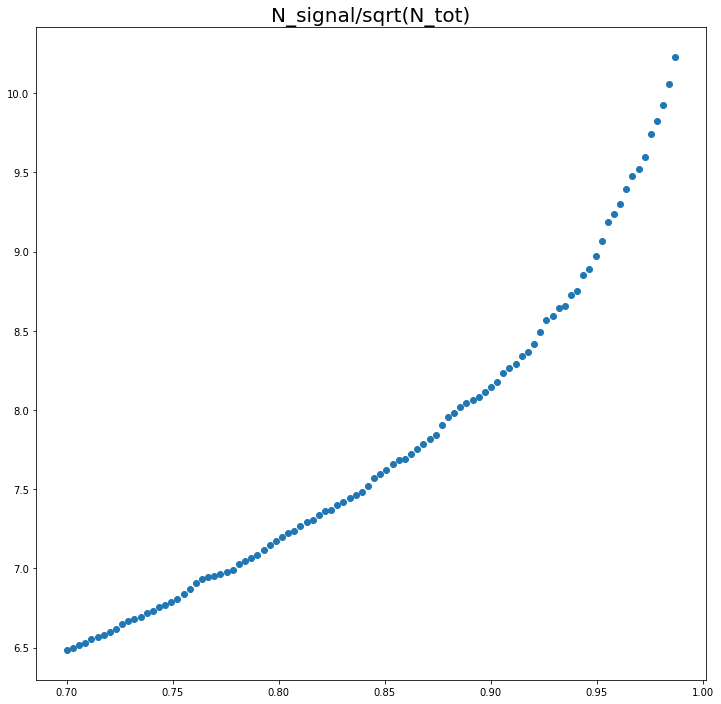

In [50]:
fig, ax = plt.subplots(1,1,figsize = (12,12))
ax.plot(cut_values, metriks1, 'o')
ax.set_title("N_signal/sqrt(N_tot)",fontsize=20)
plt.show()

In [51]:
print("True Signal", N_S)
print ("Wrong Signal", N_B)

True Signal 186.89367056999998
Wrong Signal 147


In [52]:
print("Optimal Cut Value", cut_values[np.argmax(metriks1)])
print("True Signal", N_Ss[np.argmax(metriks1)])
print("Background classified as Signal", N_Bs[np.argmax(metriks1)])

Optimal Cut Value 0.9871
True Signal 186.89367056999998
Background classified as Signal 147


## Calculate our efficiency

In [53]:
cut = cut_values[np.argmax(metriks1)]
N_TS, N_WS = 0,0

for j in range(len(Test_prob)) : 
        if Test_prob[j][2] > cut :           #we classify it as signal
            if Y_Test[j][2] == 1 : N_TS += 1        #it actually is signal
            elif Y_Test[j][2] == 0 : N_WS +=1       #it isn't signal
            else : print("Unexpected!")            #This should not happen
                
                
N_Sig = 0
for y in Y_Test : 
    if np.array_equal([0,0,1], y) : N_Sig +=1
        
eps = N_TS/N_Sig
print ("Efficiency with our cutvalue {}: ".format(cut), eps )

Efficiency with our cutvalue 0.9871:  0.9230786825251601


## Data Challenge



In [70]:
DC = pd.concat((read_root(f, 'B0', columns=Training) for f in DCFiles)).reset_index(drop=True)
DC_scale= ss.transform(DC.values)
DC_pred=pd.DataFrame(Loaded_Model.predict(DC_scale))

In [71]:
DC_pred


0         1         2
0      0.004918  0.994967  0.000114
1      0.001456  0.972018  0.026526
2      0.001361  0.991018  0.007621
3      0.001178  0.996162  0.002660
4      0.001941  0.994975  0.003083
5      0.002754  0.971824  0.025422
6      0.004625  0.982806  0.012568
7      0.021212  0.978775  0.000014
8      0.014632  0.985357  0.000011
9      0.009705  0.990293  0.000001
10     0.001162  0.995441  0.003396
11     0.002320  0.996849  0.000831
12     0.058032  0.941841  0.000127
13     0.022548  0.977385  0.000067
14     0.014430  0.977566  0.008004
15     0.009504  0.642820  0.347676
16     0.003819  0.990316  0.005865
17     0.003883  0.853980  0.142137
18     0.035466  0.964487  0.000047
19     0.003438  0.966715  0.029847
20     0.003464  0.945545  0.050991
21     0.003472  0.952918  0.043610
22     0.006500  0.993452  0.000047
23     0.033562  0.966422  0.000016
24     0.026916  0.973038  0.000046
25     0.020522  0.979411  0.000067
26     0.012254  0.987632  0.000114
27     0.008542  0.991381  0.000077
28     0.010024  0.989908  0.000068
29     0.008809  0.991110  0.000082
...         ...       ...       ...
98717  0.001229  0.998157  0.000614
98718  0.033049  0.966932  0.000018
98719  0.046550  0.953420  0.000030
98720  0.010200  0.989674  0.000126
98721  0.011780  0.988191  0.000029
98722  0.009637  0.990350  0.000013
98723  0.008793  0.991186  0.000020
98724  0.003708  0.992022  0.004271
98725  0.002142  0.982920  0.014938
98726  0.002018  0.997646  0.000336
98727  0.001700  0.997939  0.000361
98728  0.001906  0.997283  0.000812
98729  0.002291  0.997565  0.000144
98730  0.002402  0.997200  0.000398
98731  0.002668  0.997220  0.000113
98732  0.013051  0.986930  0.000019
98733  0.019563  0.980427  0.000010
98734  0.009840  0.990156  0.000004
98735  0.022153  0.977754  0.000092
98736  0.011165  0.988791  0.000044
98737  0.012138  0.987552  0.000310
98738  0.009765  0.989420  0.000815
98739  0.042219  0.957717  0.000064
98740  0.000999  0.998538  0.000463
98741  0.001026  0.998588  0.000386
98742  0.002046  0.997313  0.000640
98743  0.001283  0.996124  0.002593
98744  0.005792  0.994010  0.000198
98745  0.003855  0.995025  0.001119
98746  0.005047  0.982609  0.012344

[98747 rows x 3 columns]

In [63]:
DC_Sig = DC[DC_pred[2]>cut]
DC_Sig

Empty DataFrame
Columns: [B0_etap_pi0_ErrZ, B0_etap_decayAngle__bo0__bc, B0_etap_ErrX, B0_Pcms, B0_K_S0_VtxPvalue, B0_SigM, B0_X, B0_etap_ErrZ, B0_etap_pi0_dr, B0_etap_ErrM, B0_K_S0_ErrY, B0_etap_X, B0_K_S0_ErrX, B0_etap_pi1_X, B0_Rho, B0_etap_eta_gamma0_Pcms, B0_etap_Z, B0_decayAngle__bo1__bc, B0_etap_ErrY, B0_dr, B0_etap_Y, B0_etap_eta_ErrX, B0_VtxPvalue, B0_etap_decayAngle__bo1__bc, B0_K_S0_M, B0_etap_SigM, B0_decayAngle__bo0__bc, B0_etap_eta_M, B0_ErrZ, B0_K_S0_ErrM, B0_etap_eta_Pcms, B0_mbc, B0_etap_M, B0_etap_pi0_Y, B0_etap_pi1_Z, B0_ErrM, B0_etap_Pcms, B0_etap_pi1_VtxPvalue, B0_deltae, B0_etap_eta_ErrM, B0_etap_pi1_ErrZ, B0_etap_eta_VtxPvalue, B0_Z, B0_etap_pi1_Pcms, B0_etap_eta_X, B0_etap_eta_Y, B0_K_S0_Pcms, B0_etap_eta_Z, B0_etap_pi1_dr, B0_etap_VtxPvalue, B0_ErrX, B0_etap_pi0_VtxPvalue, B0_etap_pi0_Pcms, B0_etap_eta_ErrY, B0_K_S0_SigM, B0_etap_eta_Rho, B0_etap_pi0_Z, B0_etap_Rho, B0_K_S0_ErrZ, B0_etap_eta_ErrZ, B0_K_S0_X, B0_etap_pi1_Rho, B0_K_S0_Y, B0_significanceOfDistance, B0_etap_pi1_ErrY, B0_etap_pi1_ErrX, B0_etap_pi0_Rho, B0_distance, B0_etap_pi0_ErrY, B0_Y, B0_etap_pi1_Y, B0_TrCSMVA, B0_etap_decayAngle__bo2__bc, B0_cosAngleBetweenMomentumAndVertexVector, B0_K_S0_dr, B0_M, B0_K_S0_Rho, B0_ErrY, B0_etap_eta_gamma1_Pcms, B0_etap_eta_SigM, B0_etap_pi0_X, B0_etap_pi0_ErrX, B0_K_S0_Z]
Index: []

[0 rows x 83 columns]